In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
import os
os.chdir('MyDrive/MyDrive/facturedo_test_00')

# I Carga de los datasets

In [3]:
import pandas as pd

In [4]:
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test.shape , df_test_label.shape, df_train.shape , df_train_label.shape

((548, 72), (548, 1), (2189, 72), (2189, 1))

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
pd.crosstab(df_train_label[0],columns='count')/df_train_label.shape[0]

col_0,count
0,
0.000,0.804
1.000,0.196


In [7]:
pd.crosstab(df_test_label[0],columns='count')/df_test_label.shape[0]

col_0,count
0,
0.000,0.803
1.000,0.197


In [8]:
df_train.describe()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,tcs39,tcs40,tcs41,tcs42,tc43,tc44,tc45,tc46,tc47,tc48,tc49,tc50,tc51,tc52,tc53,dv54,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000
mean,1457.218,27893.359,2498074.466,87.099,10.318,3.608,73322869.319,10110430.983,11262.683,2283687.466,20.921,672.127,5.630,8800051.642,50.051,82.415,3090.847,713.674,0.591,52240.414,150292.414,10014.789,0.460,1.578,11831653.377,13449884.324,4.414,1003.878,0.418,6.167,27.775,2.038,5.573,15.669,421.937,34.648,35.711,34.119,0.153,0.635,0.136,0.032,0.004,0.021,0.005,0.003,0.010,0.000,0.000,0.011,0.286,0.016,0.654,0.000,0.013,0.275,0.206,0.113,0.131,0.035,0.004,0.006,0.035,0.372,0.004,0.022,0.005,0.015,0.008,0.044,0.122,0.000
std,842.159,277091.982,3713768.961,29.549,25.922,8.478,300925686.482,42093940.057,154044.166,3283374.390,13.120,153.925,1.322,42598076.639,388.629,1058.498,34525.106,6590.563,2.589,482665.062,449897.589,71672.069,2.738,7.472,63410335.155,41332366.272,6.547,2893.458,2.443,24.061,44.799,8.405,22.946,36.359,345.095,37.068,59.697,33.231,0.361,0.482,0.343,0.177,0.060,0.143,0.067,0.052,0.097,0.021,0.021,0.104,0.452,0.127,0.476,0.021,0.112,0.446,0.405,0.316,0.338,0.183,0.064,0.080,0.183,0.483,0.064,0.146,0.067,0.120,0.088,0.206,0.328,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-3.000,0.000,0.000,0.000,0.000,0.000,0.000,-3.000,-3.000,-3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,731.000,0.000,14119.880,100.000,0.000,0.000,2898816.860,0.000,0.000,0.000,11.000,610.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16292.585,0.000,0.000,35.000,-1.288,0.000,0.000,0.000,0.000,0.000,121.000,30.000,1.000,30.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1453.000,0.000,178100.560,100.000,0.000,0.000,16230241.680,19704.600,0.000,0.000,22.000,699.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82233.967,646617.050,0.000,325.000,-0.625,0.000,0.000,0.000,0.000,0.000,323.000,31.000,1.000,31.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2188.000,0.000,3958600.590,100.000,0.000,5.000,33084267.450,2560790.580,0.000,4355600.000,24.000,791.000,6.000,526941.680,0.000,0.000,0.000,85.000,0.000,0.000,105000.000,0.000,0.000,0.000,2867600.603,13218157.600,7.000,675.000,1.389,0.000,100.000,0.000,0.000,0.000,723.000,31.000,62.000,31.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2907.000,5030245.826,12570777.870,100.000,100.000,183.000,3283312500.

In [9]:
columns = df_train.columns
for column in columns:
  q = len(df_train[column].unique())
  print("{} : {}".format(column,q))

Unnamed: 0 : 2189
v0 : 28
v1 : 1186
v2 : 36
v3 : 38
v4 : 28
v5 : 746
v6 : 485
v7 : 18
v8 : 109
v9 : 62
v10 : 350
v11 : 7
v12 : 268
v13 : 49
v14 : 41
v15 : 94
v16 : 113
v17 : 23
v18 : 86
v19 : 126
v20 : 81
v21 : 22
v22 : 35
v23 : 536
v24 : 346
v25 : 33
v26 : 419
v27 : 800
v28 : 2
v29 : 2
v30 : 42
v31 : 2
v32 : 2
v33 : 458
v34 : 34
v35 : 26
v36 : 29
tcs37 : 2
tcs38 : 2
tcs39 : 2
tcs40 : 2
tcs41 : 2
tcs42 : 2
tc43 : 2
tc44 : 2
tc45 : 2
tc46 : 2
tc47 : 2
tc48 : 2
tc49 : 2
tc50 : 2
tc51 : 2
tc52 : 2
tc53 : 2
dv54 : 2
ae55 : 2
ae56 : 2
ae57 : 2
ae58 : 2
ae59 : 2
ae60 : 2
ae61 : 2
ae62 : 2
ae63 : 2
ae64 : 2
ae65 : 2
ae66 : 2
ae67 : 2
ae68 : 2
d69 : 2
d70 : 1


Por medio de .describe() y .unique() se puede observar que variables son continuas y que variables son categóricas

In [10]:
continous_vars = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 
 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 
 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36']
non_continous_vars = ['tcs37',
       'tcs38', 'tcs39', 'tcs40', 'tcs41', 'tcs42', 'tc43', 'tc44', 'tc45',
       'tc46', 'tc47', 'tc48', 'tc49', 'tc50', 'tc51', 'tc52', 'tc53', 'dv54',
       'ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68', 'd69', 'd70']

# II Exploración de las variables v0 - v36

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Función para el calculo del WOE y el IV en las variables continuas
def calc_woe_and_iv(df_X,df_Y,var_name,bins=20):

  print('El 5% de las observaciones que debe cumplir cada intervalo es: {}, para {} con {} rangos'.format(0.05*df_X.shape[0],var_name,bins))

  outputs_list = [v[0] for v in df_Y.astype(int).values]
  new_df = pd.DataFrame({var_name : df_X[var_name].values , "output" : outputs_list })

  if (new_df[var_name].dtype.kind in 'bifc') and (len(np.unique(new_df[var_name]))>10):
    new_df['ranks'] = pd.qcut(df_train[var_name], bins,  duplicates='drop')
    df_woe = pd. crosstab(new_df['ranks'],new_df['output'])
  else:
    df_woe = pd. crosstab(new_df[var_name],new_df['output'])

  df_woe['total_N'] = df_woe.sum(axis=1)
  n_0 = df_woe[0].sum()
  n_1 = df_woe[1].sum()

  df_woe['porc_bad'] = df_woe[[0]].apply(lambda x: x/n_0 ,axis=1)
  df_woe['porc_good'] = df_woe[[1]].apply(lambda x: x/n_1 ,axis=1)
  df_woe['woe'] = df_woe[['porc_bad','porc_good']].apply(lambda x: math.log(x[1]/x[0]) ,axis=1)
  df_woe['iv'] = df_woe[['porc_bad','porc_good','woe']].apply(lambda x: (x[1]-x[0])*x[2] ,axis=1)

  tmp_df_1 = pd.DataFrame()
  if (len(np.unique(df_X[var_name]))>10):
    tmp_df_1['interval'] = df_woe.index
    tmp_df_1['int_left'] = tmp_df_1['interval'].map(lambda x: x.left)

    plt.figure(figsize=(20,4))
    plt.plot(tmp_df_1.int_left.astype('float'),df_woe.woe, marker='o', linestyle='--', color='r')
    plt.show()
  else:
    plt.figure(figsize=(20,4))
    plt.plot(df_woe.index,df_woe.woe, marker='o', linestyle='--', color='r')
    plt.show()
  
  iv_score = df_woe['iv'].sum()
  print('El "IV score" es = {}'.format(iv_score))

  return df_woe, iv_score

 ## Visualización por cada *variable*
Se observa el comportamiento de las variables para definir el número de "bins" a usar en cada una.
Aunque no cumplan "monotonicidad" permiten identificar en que rangos de datos hay mayor probabilidad de encontrar un cliente moroso o no

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v0 con 50 rangos


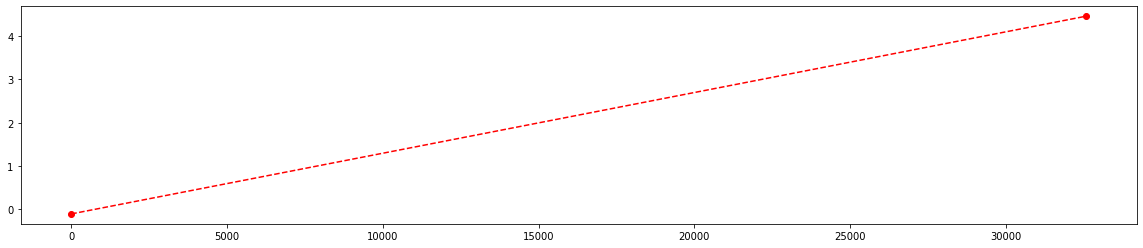

El "IV score" es = 0.4410611026217843


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 32570.69]       1758  387     2145     0.999      0.902 -0.102 0.010
 (32570.69, 5030245.826]     2   42       44     0.001      0.098  4.456 0.431,
 0.4410611026217843)

In [13]:
calc_woe_and_iv(df_train,df_train_label,'v0',50)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v1 con 10 rangos


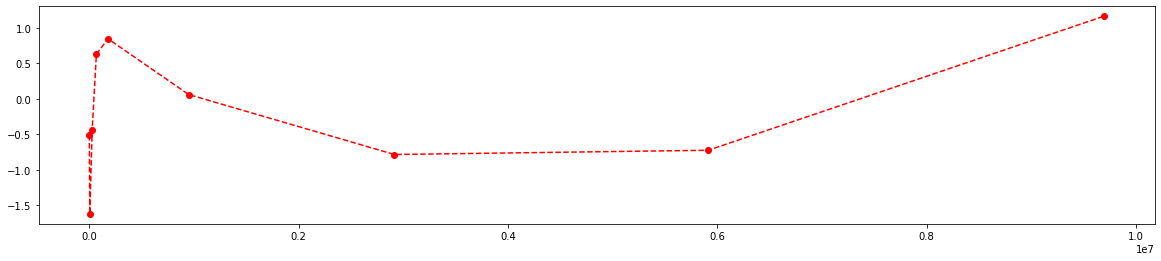

El "IV score" es = 0.6198777964580664


(output                        0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                         
 (-0.001, 4460.5]            383  56      439     0.218      0.131 -0.511 0.045
 (4460.5, 27509.61]          208  10      218     0.118      0.023 -1.623 0.154
 (27509.61, 67584.01]        191  30      221     0.109      0.070 -0.439 0.017
 (67584.01, 178100.56]       149  68      217     0.085      0.159  0.627 0.046
 (178100.56, 950247.198]     139  79      218     0.079      0.184  0.847 0.089
 (950247.198, 2915673.476]   174  45      219     0.099      0.105  0.059 0.000
 (2915673.476, 5914389.51]   198  22      220     0.113      0.051 -0.786 0.048
 (5914389.51, 9694103.754]   195  23      218     0.111      0.054 -0.726 0.042
 (9694103.754, 12570777.87]  123  96      219     0.070      0.224  1.164 0.179,
 0.6198777964580664)

In [14]:
calc_woe_and_iv(df_train,df_train_label,'v1',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v2 con 20 rangos


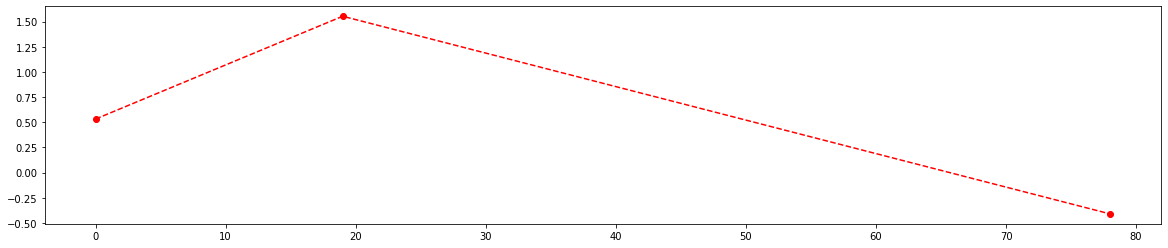

El "IV score" es = 0.49649929937901444


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 19.0]   159   66      225     0.090      0.154  0.532 0.034
 (19.0, 78.0]     105  121      226     0.060      0.282  1.553 0.345
 (78.0, 100.0]   1496  242     1738     0.850      0.564 -0.410 0.117,
 0.49649929937901444)

In [15]:
calc_woe_and_iv(df_train,df_train_label,'v2',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v3 con 10 rangos


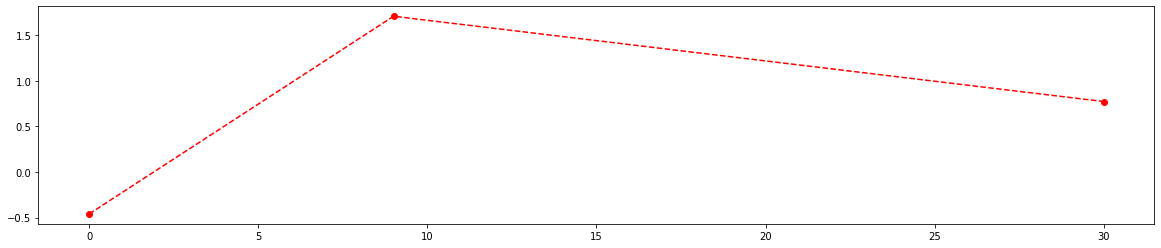

El "IV score" es = 0.6204585923582087


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 9.0]  1540  237     1777     0.875      0.552 -0.460 0.148
 (9.0, 30.0]      93  125      218     0.053      0.291  1.707 0.407
 (30.0, 100.0]   127   67      194     0.072      0.156  0.772 0.065,
 0.6204585923582087)

In [16]:
calc_woe_and_iv(df_train,df_train_label,'v3',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v4 con 10 rangos


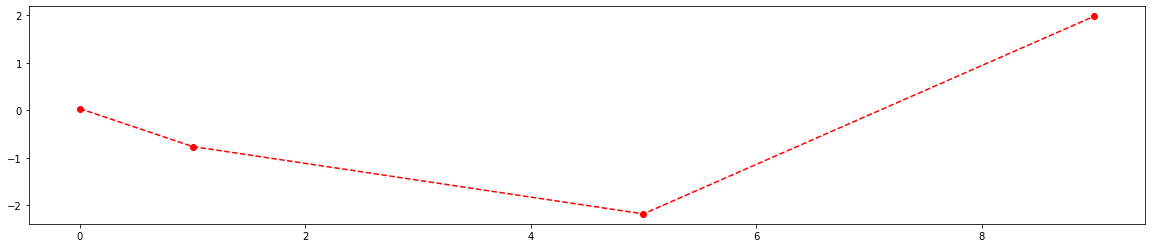

El "IV score" es = 0.8104760416735252


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1063  268     1331     0.604      0.625  0.034 0.001
 (1.0, 5.0]      379   43      422     0.215      0.100 -0.765 0.088
 (5.0, 9.0]      255    7      262     0.145      0.016 -2.184 0.281
 (9.0, 183.0]     63  111      174     0.036      0.259  1.978 0.441,
 0.8104760416735252)

In [17]:
calc_woe_and_iv(df_train,df_train_label,'v4',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v5 con 10 rangos


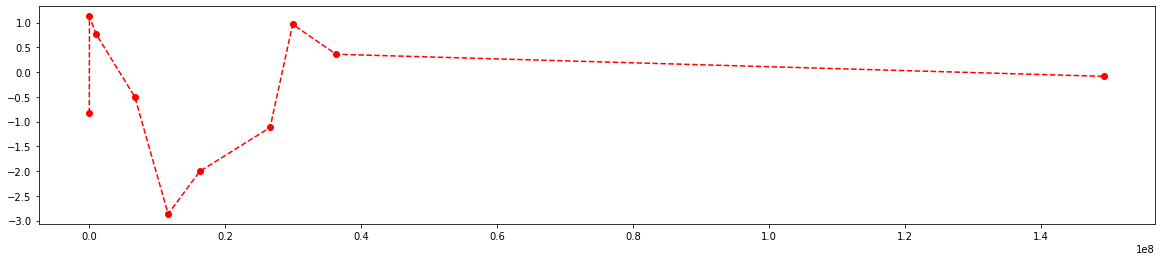

El "IV score" es = 1.0856023450802923


(output                           0   1  total_N  ...  porc_good    woe    iv
 ranks                                            ...                        
 (-0.001, 24283.438]            198  21      219  ...      0.049 -0.832 0.053
 (24283.438, 969808.192]        125  94      219  ...      0.219  1.127 0.167
 (969808.192, 6695220.26]       144  76      220  ...      0.177  0.773 0.074
 (6695220.26, 11597412.738]     190  28      218  ...      0.065 -0.503 0.021
 (11597412.738, 16230241.68]    216   3      219  ...      0.007 -2.865 0.332
 (16230241.68, 26593973.98]     214   7      221  ...      0.016 -2.008 0.211
 (26593973.98, 29915184.24]     201  16      217  ...      0.037 -1.119 0.086
 (29915184.24, 36292514.51]     144  92      236  ...      0.214  0.964 0.128
 (36292514.51, 149234999.586]   149  52      201  ...      0.121  0.359 0.013
 (149234999.586, 3283312500.0]  179  40      219  ...      0.093 -0.087 0.001
 
 [10 rows x 7 columns], 1.0856023450802923)

In [18]:
calc_woe_and_iv(df_train,df_train_label,'v5',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v6 con 10 rangos


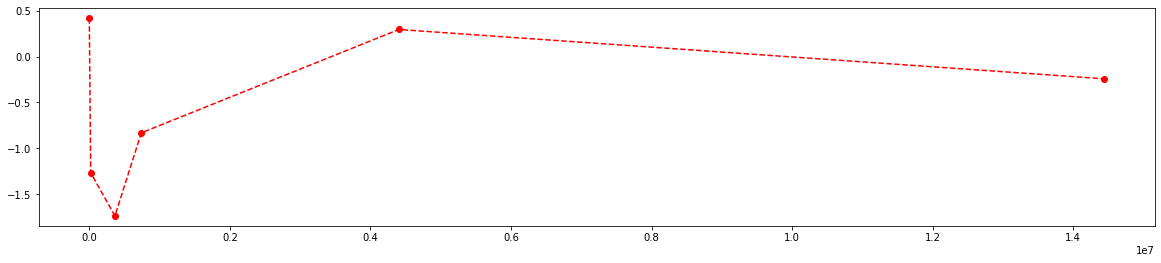

El "IV score" es = 0.4425238869535364


(output                         0    1  total_N  ...  porc_good    woe    iv
 ranks                                           ...                        
 (-0.001, 19704.6]            800  296     1096  ...      0.690  0.417 0.098
 (19704.6, 364900.0]          204   14      218  ...      0.033 -1.267 0.106
 (364900.0, 740338.2]         210    9      219  ...      0.021 -1.738 0.171
 (740338.2, 4405700.0]        198   21      219  ...      0.049 -0.832 0.053
 (4405700.0, 14436422.12]     165   54      219  ...      0.126  0.295 0.009
 (14436422.12, 441531393.46]  183   35      218  ...      0.082 -0.243 0.005
 
 [6 rows x 7 columns], 0.4425238869535364)

In [19]:
calc_woe_and_iv(df_train,df_train_label,'v6',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v7 con 200 rangos


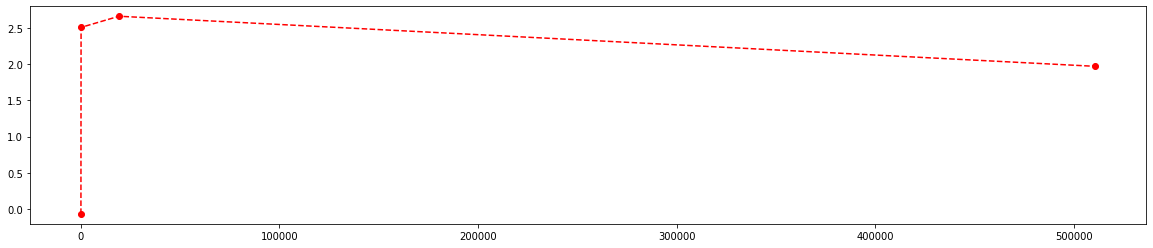

El "IV score" es = 0.16968816670039838


(output                       0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                         
 (-0.001, 74.599]          1748  397     2145     0.993      0.925 -0.071 0.005
 (74.599, 19156.47]           6   18       24     0.003      0.042  2.510 0.097
 (19156.47, 510930.344]       2    7        9     0.001      0.016  2.664 0.040
 (510930.344, 2427616.87]     4    7       11     0.002      0.016  1.971 0.028,
 0.16968816670039838)

In [20]:
calc_woe_and_iv(df_train,df_train_label,'v7',200)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v8 con 19 rangos


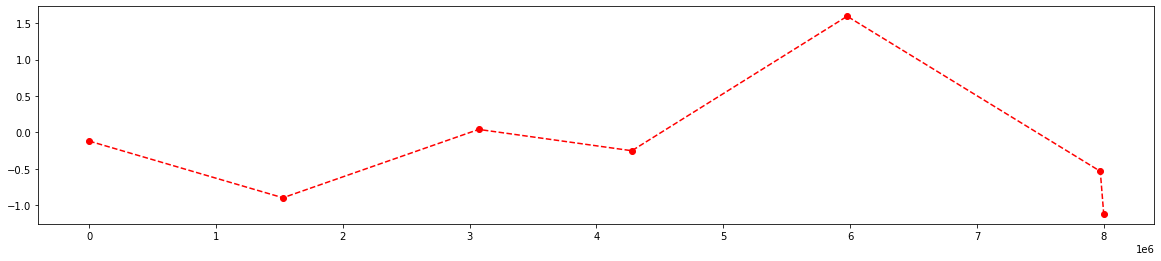

El "IV score" es = 0.42789850274585267


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 1527834.71]     1137  246     1383     0.646      0.573 -0.119 0.009
 (1527834.71, 3071719.0]   141   14      155     0.080      0.033 -0.898 0.043
 (3071719.0, 4279059.0]     63   16       79     0.036      0.037  0.041 0.000
 (4279059.0, 5977000.0]     95   18      113     0.054      0.042 -0.252 0.003
 (5977000.0, 7972827.7]     89  107      196     0.051      0.249  1.596 0.317
 (7972827.7, 8000000.0]    147   21      168     0.084      0.049 -0.534 0.018
 (8000000.0, 10000000.0]    88    7       95     0.050      0.016 -1.120 0.038,
 0.42789850274585267)

In [21]:
calc_woe_and_iv(df_train,df_train_label,'v8',19)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v9 con 10 rangos


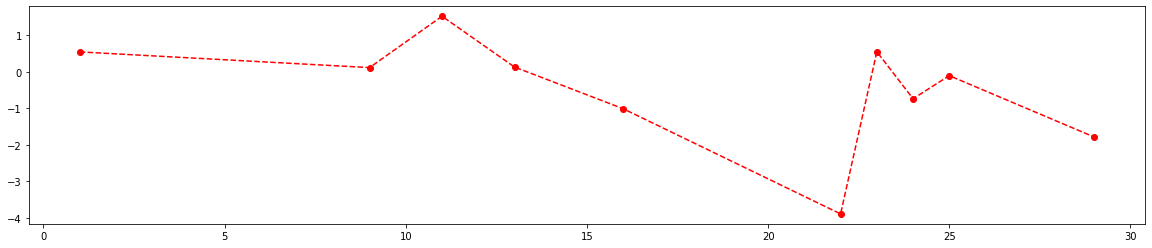

El "IV score" es = 0.8908376564483325


(output           0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                             
 (0.999, 9.0]   186   78      264     0.106      0.182  0.543 0.041
 (9.0, 11.0]    264   72      336     0.150      0.168  0.112 0.002
 (11.0, 13.0]    35   39       74     0.020      0.091  1.520 0.108
 (13.0, 16.0]   166   46      212     0.094      0.107  0.128 0.002
 (16.0, 22.0]   215   19      234     0.122      0.044 -1.015 0.079
 (22.0, 23.0]   202    1      203     0.115      0.002 -3.897 0.438
 (23.0, 24.0]   285  120      405     0.162      0.280  0.547 0.064
 (24.0, 25.0]    43    5       48     0.024      0.012 -0.740 0.009
 (25.0, 29.0]   192   42      234     0.109      0.098 -0.108 0.001
 (29.0, 115.0]  172    7      179     0.098      0.016 -1.790 0.146,
 0.8908376564483325)

In [22]:
calc_woe_and_iv(df_train,df_train_label,'v9',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v10 con 10 rangos


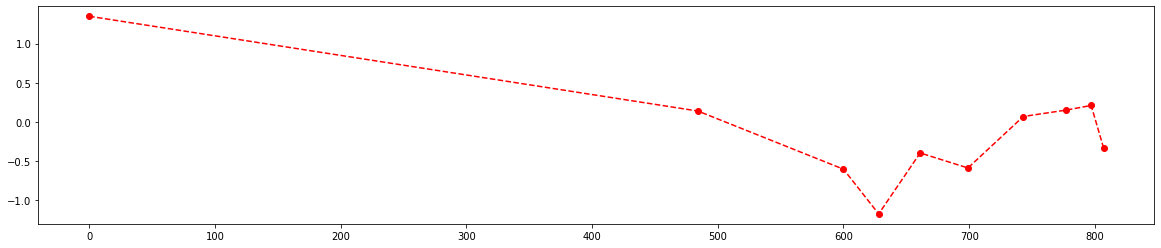

El "IV score" es = 0.4302410954839192


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 484.2]  113  106      219     0.064      0.247  1.348 0.246
 (484.2, 600.0]   175   49      224     0.099      0.114  0.139 0.002
 (600.0, 628.0]   195   26      221     0.111      0.061 -0.603 0.030
 (628.0, 661.0]   199   15      214     0.113      0.035 -1.174 0.092
 (661.0, 699.0]   189   31      220     0.107      0.072 -0.396 0.014
 (699.0, 743.0]   192   26      218     0.109      0.061 -0.588 0.028
 (743.0, 777.0]   180   47      227     0.102      0.110  0.069 0.001
 (777.0, 797.0]   180   51      231     0.102      0.119  0.150 0.002
 (797.0, 807.0]   153   46      199     0.087      0.107  0.210 0.004
 (807.0, 936.0]   184   32      216     0.105      0.075 -0.338 0.010,
 0.4302410954839192)

In [23]:
calc_woe_and_iv(df_train,df_train_label,'v10',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v11 con 10 rangos


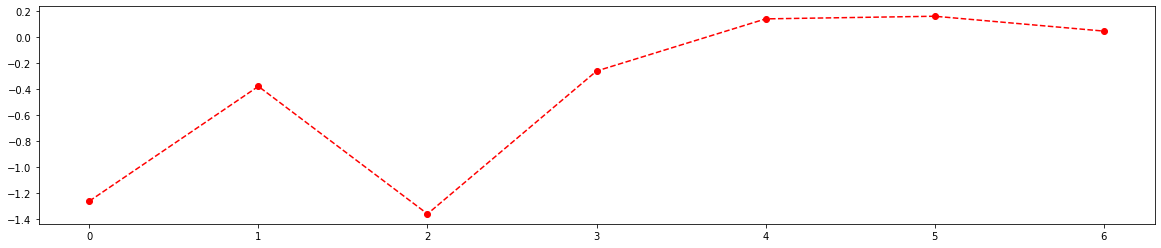

El "IV score" es = 0.057370937332350144


(output     0    1  total_N  porc_bad  porc_good    woe    iv
 v11                                                         
 0.000     87    6       93     0.049      0.014 -1.263 0.045
 1.000      6    1        7     0.003      0.002 -0.380 0.000
 2.000     16    1       17     0.009      0.002 -1.361 0.009
 3.000     16    3       19     0.009      0.007 -0.262 0.001
 4.000     25    7       32     0.014      0.016  0.139 0.000
 5.000     21    6       27     0.012      0.014  0.159 0.000
 6.000   1589  405     1994     0.903      0.944  0.045 0.002,
 0.057370937332350144)

In [24]:
calc_woe_and_iv(df_train,df_train_label,'v11',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v12 con 15 rangos


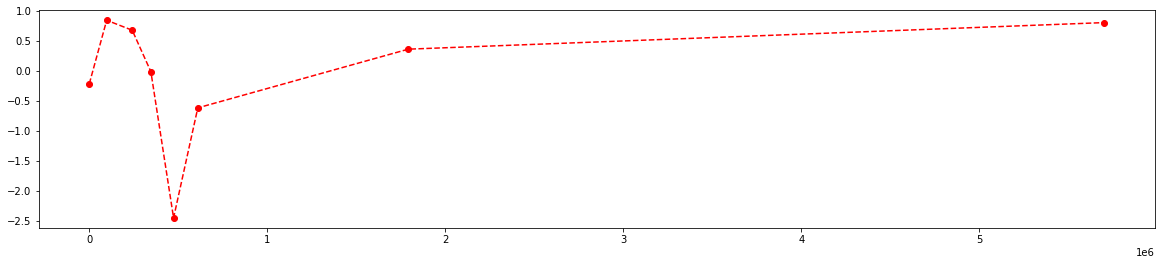

El "IV score" es = 0.38419410027678125


(output                        0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                          
 (-0.001, 97675.62]          980  192     1172     0.557      0.448 -0.218 0.024
 (97675.62, 241201.23]       101   57      158     0.057      0.133  0.840 0.063
 (241201.23, 345958.64]       90   43      133     0.051      0.100  0.673 0.033
 (345958.64, 473499.9]       121   29      150     0.069      0.068 -0.017 0.000
 (473499.9, 609655.15]       143    3      146     0.081      0.007 -2.453 0.182
 (609655.15, 1792496.156]    122   16      138     0.069      0.037 -0.620 0.020
 (1792496.156, 5700426.25]   109   38      147     0.062      0.089  0.358 0.010
 (5700426.25, 283484419.52]   94   51      145     0.053      0.119  0.800 0.052,
 0.38419410027678125)

In [25]:
calc_woe_and_iv(df_train,df_train_label,'v12',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v13 con 60 rangos


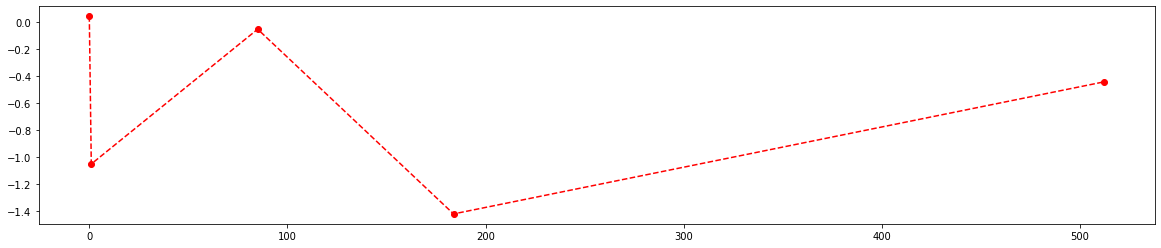

El "IV score" es = 0.04364895692467646


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 1.0]       1634  415     2049     0.928      0.967  0.041 0.002
 (1.0, 85.0]           47    4       51     0.027      0.009 -1.052 0.018
 (85.0, 183.867]       13    3       16     0.007      0.007 -0.055 0.000
 (183.867, 512.133]    34    2       36     0.019      0.005 -1.422 0.021
 (512.133, 5991.0]     32    5       37     0.018      0.012 -0.445 0.003,
 0.04364895692467646)

In [26]:
calc_woe_and_iv(df_train,df_train_label,'v13',60) 

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v14 con 60 rangos


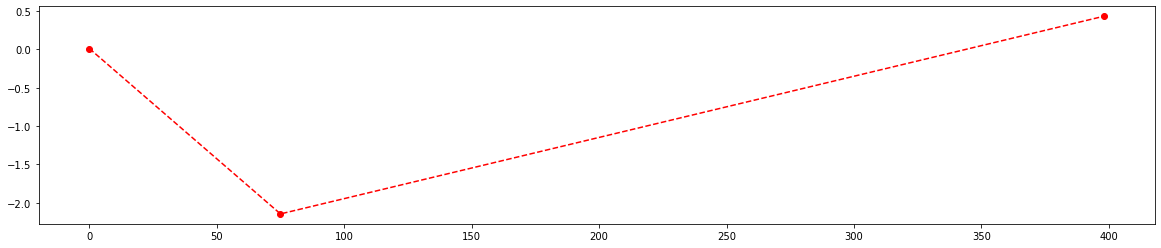

El "IV score" es = 0.040904500279323325


(output               0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                 
 (-0.001, 75.0]    1701  419     2120     0.966      0.977  0.011 0.000
 (75.0, 398.0]       35    1       36     0.020      0.002 -2.144 0.038
 (398.0, 41274.0]    24    9       33     0.014      0.021  0.431 0.003,
 0.040904500279323325)

In [27]:
calc_woe_and_iv(df_train,df_train_label,'v14',60)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v15 con 20 rangos


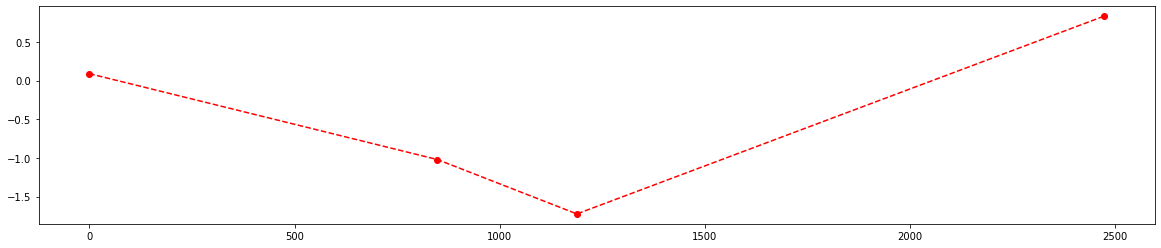

El "IV score" es = 0.1927484296685345


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 848.0]     1404  374     1778     0.798      0.872  0.089 0.007
 (848.0, 1188.0]      205   18      223     0.116      0.042 -1.021 0.076
 (1188.0, 2472.0]      92    4       96     0.052      0.009 -1.724 0.074
 (2472.0, 861279.0]    59   33       92     0.034      0.077  0.831 0.036,
 0.1927484296685345)

In [28]:
calc_woe_and_iv(df_train,df_train_label,'v15',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v16 con 10 rangos


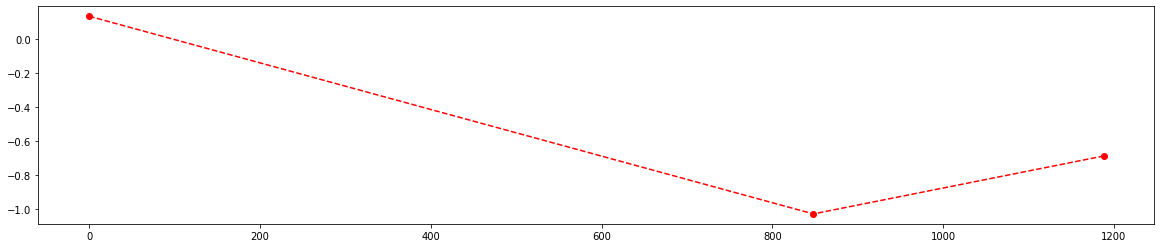

El "IV score" es = 0.12264554298194057


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 848.0]     1406  393     1799     0.799      0.916  0.137 0.016
 (848.0, 1188.0]      207   18      225     0.118      0.042 -1.031 0.078
 (1188.0, 173062.0]   147   18      165     0.084      0.042 -0.688 0.029,
 0.12264554298194057)

In [29]:
calc_woe_and_iv(df_train,df_train_label,'v16',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v17 con 15 rangos


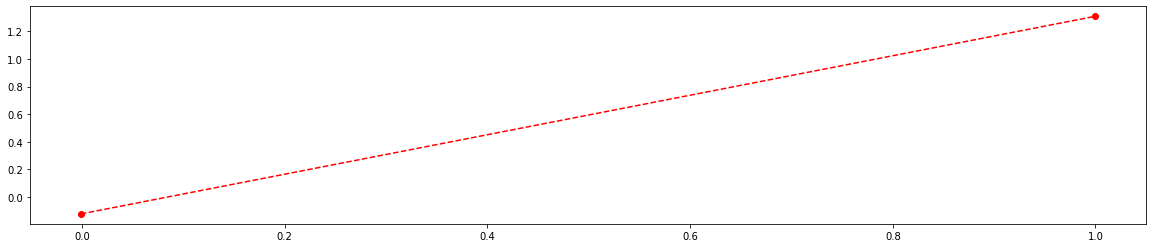

El "IV score" es = 0.15837316358046707


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1688  364     2052     0.959      0.848 -0.123 0.014
 (1.0, 24.0]      72   65      137     0.041      0.152  1.309 0.145,
 0.15837316358046707)

In [30]:
calc_woe_and_iv(df_train,df_train_label,'v17',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v18 con 10 rangos


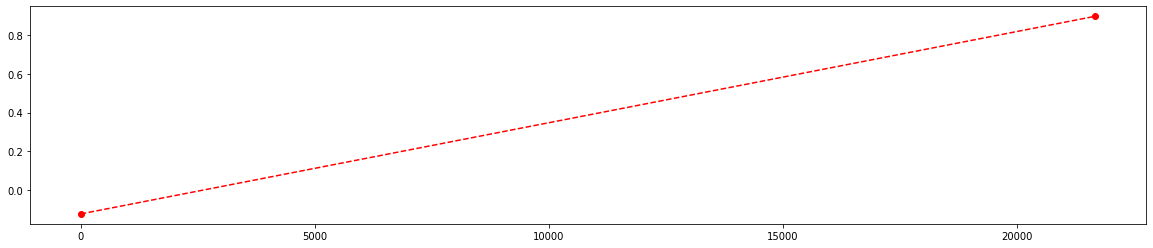

El "IV score" es = 0.10802995090427327


(output                     0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                       
 (-0.001, 21669.0]       1631  352     1983     0.927      0.821 -0.122 0.013
 (21669.0, 10763627.37]   129   77      206     0.073      0.179  0.896 0.095,
 0.10802995090427327)

In [31]:
calc_woe_and_iv(df_train,df_train_label,'v18',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v19 con 10 rangos


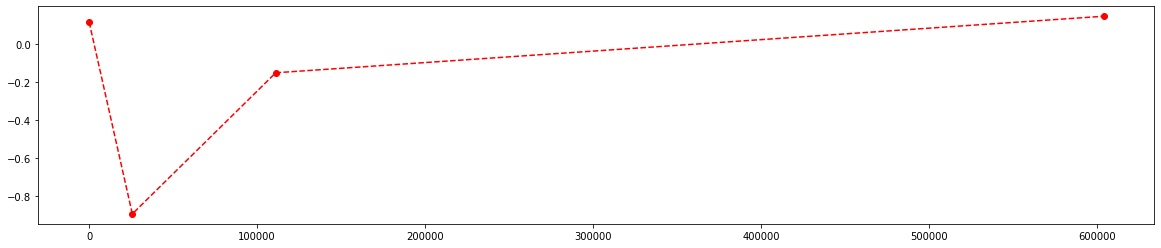

El "IV score" es = 0.07440333979880775


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 25702.3]        1204  329     1533     0.684      0.767  0.114 0.009
 (25702.3, 111137.18]      201   20      221     0.114      0.047 -0.896 0.061
 (111137.18, 604199.98]    277   58      335     0.157      0.135 -0.152 0.003
 (604199.98, 5117872.15]    78   22      100     0.044      0.051  0.146 0.001,
 0.07440333979880775)

In [32]:
calc_woe_and_iv(df_train,df_train_label,'v19',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v20 con 20 rangos


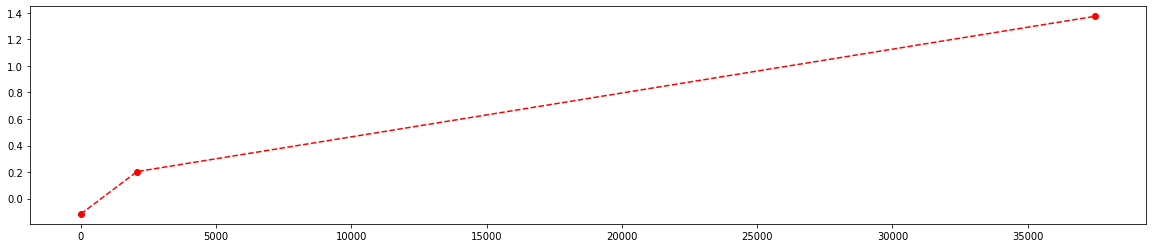

El "IV score" es = 0.13565513114220587


(output                    0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                      
 (-0.001, 2073.99]      1620  352     1972     0.920      0.821 -0.115 0.011
 (2073.99, 37505.0]       87   26      113     0.049      0.061  0.204 0.002
 (37505.0, 1413961.76]    53   51      104     0.030      0.119  1.373 0.122,
 0.13565513114220587)

In [33]:
calc_woe_and_iv(df_train,df_train_label,'v20',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v21 con 20 rangos


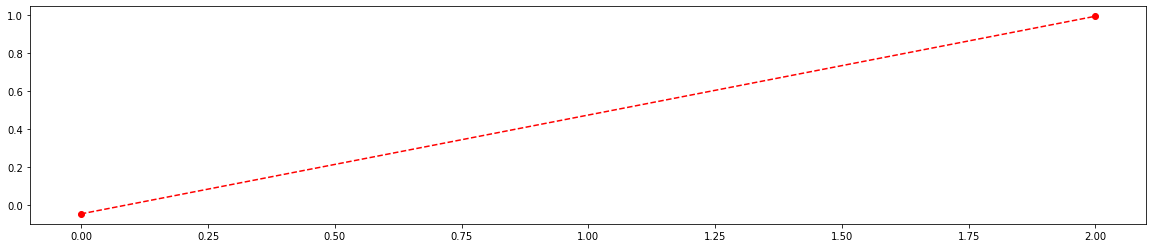

El "IV score" es = 0.047533183313123326


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 2.0]  1713  398     2111     0.973      0.928 -0.048 0.002
 (2.0, 62.0]      47   31       78     0.027      0.072  0.995 0.045,
 0.047533183313123326)

In [34]:
calc_woe_and_iv(df_train,df_train_label,'v21',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v22 con 20 rangos


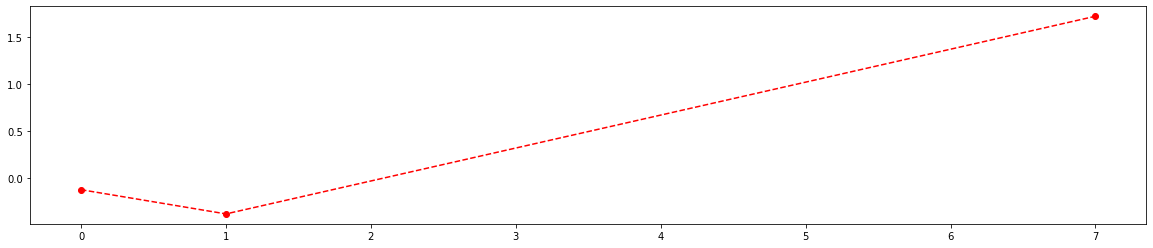

El "IV score" es = 0.22670777965747493


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1636  353     1989     0.930      0.823 -0.122 0.013
 (1.0, 7.0]       78   13       91     0.044      0.030 -0.380 0.005
 (7.0, 145.0]     46   63      109     0.026      0.147  1.726 0.208,
 0.22670777965747493)

In [35]:
calc_woe_and_iv(df_train,df_train_label,'v22',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v23 con 12 rangos


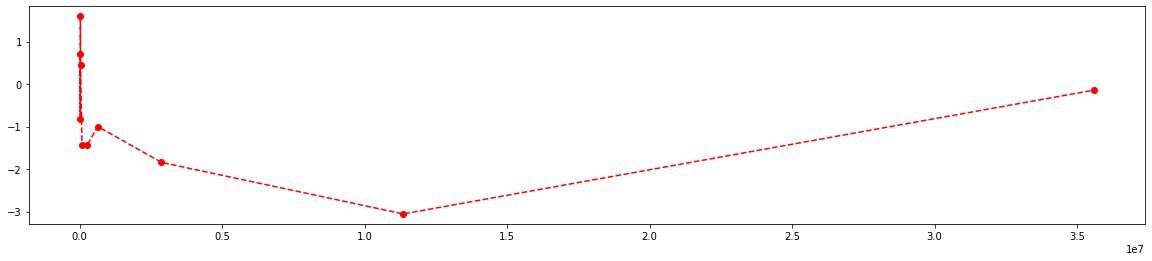

El "IV score" es = 1.2180463575595772


(output                            0    1  total_N  ...  porc_good    woe    iv
 ranks                                              ...                        
 (-0.001, 16292.585]             393  194      587  ...      0.452  0.706 0.162
 (16292.585, 25169.514]          139   15      154  ...      0.035 -0.815 0.036
 (25169.514, 30846.513]           78   94      172  ...      0.219  1.598 0.279
 (30846.513, 82233.967]          132   50      182  ...      0.117  0.441 0.018
 (82233.967, 257552.565]         172   10      182  ...      0.023 -1.433 0.107
 (257552.565, 636730.21]         173   10      183  ...      0.023 -1.439 0.108
 (636730.21, 2867600.603]        167   15      182  ...      0.035 -0.998 0.060
 (2867600.603, 11353328.873]     181    7      188  ...      0.016 -1.841 0.159
 (11353328.873, 35600415.522]    174    2      176  ...      0.005 -3.054 0.288
 (35600415.522, 1357272135.553]  151   32      183  ...      0.075 -0.140 0.002
 
 [10 rows x 7 columns], 1.218046357559

In [36]:
calc_woe_and_iv(df_train,df_train_label,'v23',12) 

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v24 con 15 rangos


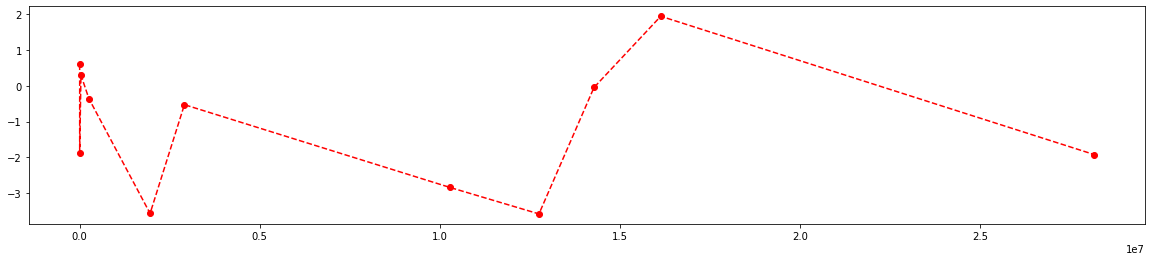

El "IV score" es = 1.5942500037416318


(output                          0    1  total_N  ...  porc_good    woe    iv
 ranks                                            ...                        
 (-0.001, 0.00333]             506  224      730  ...      0.522  0.597 0.140
 (0.00333, 35601.6]            163    6      169  ...      0.014 -1.890 0.149
 (35601.6, 255187.26]           94   31      125  ...      0.072  0.302 0.006
 (255187.26, 1954892.22]       123   21      144  ...      0.049 -0.356 0.007
 (1954892.22, 2908278.46]      145    1      146  ...      0.002 -3.565 0.285
 (2908278.46, 10274418.76]     132   19      151  ...      0.044 -0.527 0.016
 (10274418.76, 12752659.39]    140    2      142  ...      0.005 -2.837 0.212
 (12752659.39, 14280359.63]    147    1      148  ...      0.002 -3.579 0.291
 (14280359.63, 16134256.08]    116   27      143  ...      0.063 -0.046 0.000
 (16134256.08, 28169672.37]     54   92      146  ...      0.214  1.944 0.357
 (28169672.37, 630195304.601]  140    5      145  ...      0.012

In [37]:
calc_woe_and_iv(df_train,df_train_label,'v24',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v25 con 15 rangos


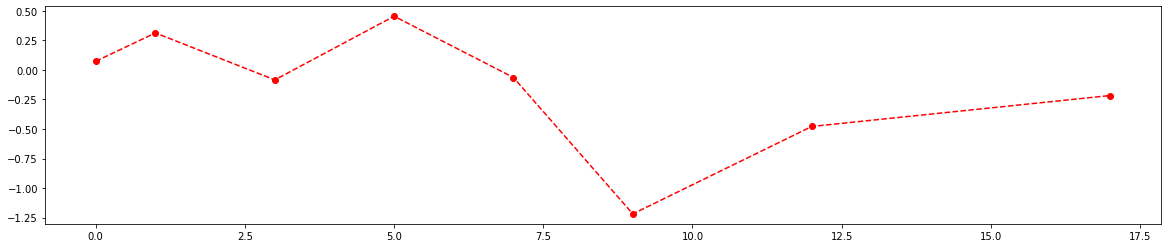

El "IV score" es = 0.09633845362859278


(output           0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                             
 (-0.001, 1.0]  969  254     1223     0.551      0.592  0.073 0.003
 (1.0, 3.0]     105   35      140     0.060      0.082  0.313 0.007
 (3.0, 5.0]     125   28      153     0.071      0.065 -0.084 0.000
 (5.0, 7.0]      99   38      137     0.056      0.089  0.454 0.015
 (7.0, 9.0]     105   24      129     0.060      0.056 -0.064 0.000
 (9.0, 12.0]    111    8      119     0.063      0.019 -1.218 0.054
 (12.0, 17.0]   139   21      160     0.079      0.049 -0.478 0.014
 (17.0, 38.0]   107   21      128     0.061      0.049 -0.217 0.003,
 0.09633845362859278)

In [38]:
calc_woe_and_iv(df_train,df_train_label,'v25',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v26 con 10 rangos


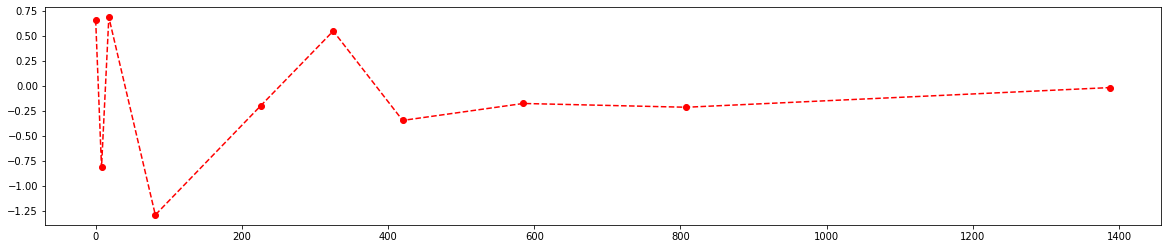

El "IV score" es = 0.3250474403952597


(output               0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                
 (-0.001, 8.0]      187  88      275     0.106      0.205  0.658 0.065
 (8.0, 18.0]        176  19      195     0.100      0.044 -0.814 0.045
 (18.0, 81.6]       126  61      187     0.072      0.142  0.686 0.048
 (81.6, 226.0]      209  14      223     0.119      0.033 -1.292 0.111
 (226.0, 325.0]     205  41      246     0.116      0.096 -0.198 0.004
 (325.0, 420.0]     147  62      209     0.084      0.145  0.548 0.033
 (420.0, 585.0]     174  30      204     0.099      0.070 -0.346 0.010
 (585.0, 808.0]     186  38      224     0.106      0.089 -0.177 0.003
 (808.0, 1388.0]    183  36      219     0.104      0.084 -0.214 0.004
 (1388.0, 41382.0]  167  40      207     0.095      0.093 -0.018 0.000,
 0.3250474403952597)

In [39]:
calc_woe_and_iv(df_train,df_train_label,'v26',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v27 con 10 rangos


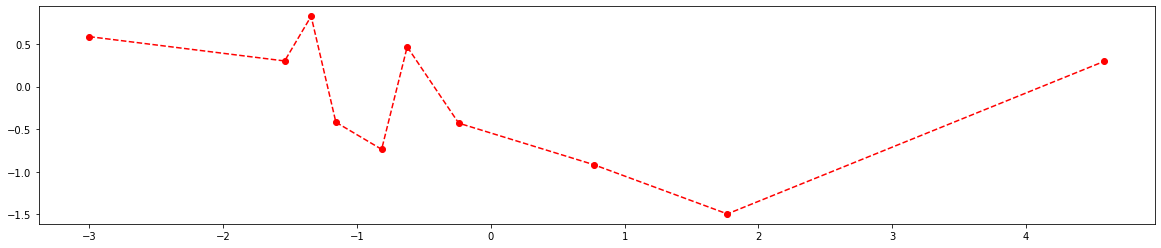

El "IV score" es = 0.4404037656096578


(output              0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-3.001, -1.541]  153  67      220     0.087      0.156  0.586 0.041
 (-1.541, -1.343]  164  54      218     0.093      0.126  0.301 0.010
 (-1.343, -1.158]  142  79      221     0.081      0.184  0.825 0.085
 (-1.158, -0.816]  187  30      217     0.106      0.070 -0.418 0.015
 (-0.816, -0.625]  197  23      220     0.112      0.054 -0.736 0.043
 (-0.625, -0.24]   157  61      218     0.089      0.142  0.466 0.025
 (-0.24, 0.769]    189  30      219     0.107      0.070 -0.429 0.016
 (0.769, 1.768]    205  20      225     0.116      0.047 -0.916 0.064
 (1.768, 4.582]    201  11      212     0.114      0.026 -1.494 0.132
 (4.582, 8.083]    165  54      219     0.094      0.126  0.295 0.009,
 0.4404037656096578)

In [40]:
calc_woe_and_iv(df_train,df_train_label,'v27',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v28 con 10 rangos


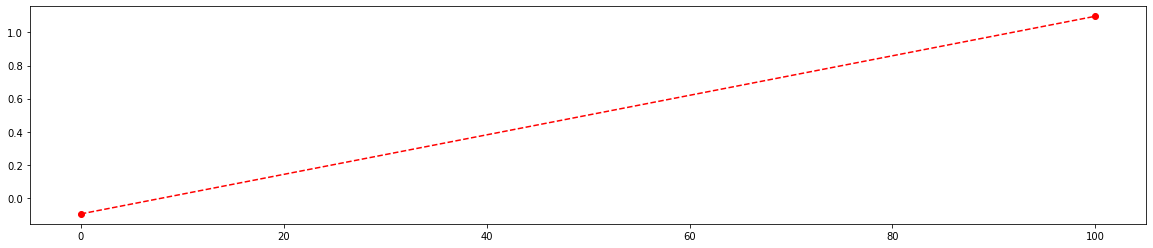

El "IV score" es = 0.105832593003581


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v28                                                          
 0.000    1682  372     2054     0.956      0.867 -0.097 0.009
 100.000    78   57      135     0.044      0.133  1.098 0.097,
 0.105832593003581)

In [41]:
calc_woe_and_iv(df_train,df_train_label,'v28',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v29 con 10 rangos


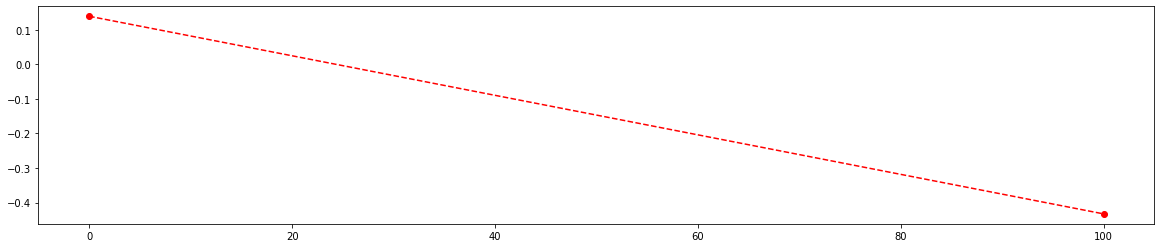

El "IV score" es = 0.0599761720686027


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v29                                                          
 0.000    1235  346     1581     0.702      0.807  0.139 0.015
 100.000   525   83      608     0.298      0.193 -0.433 0.045,
 0.0599761720686027)

In [42]:
calc_woe_and_iv(df_train,df_train_label,'v29',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v30 con 7 rangos


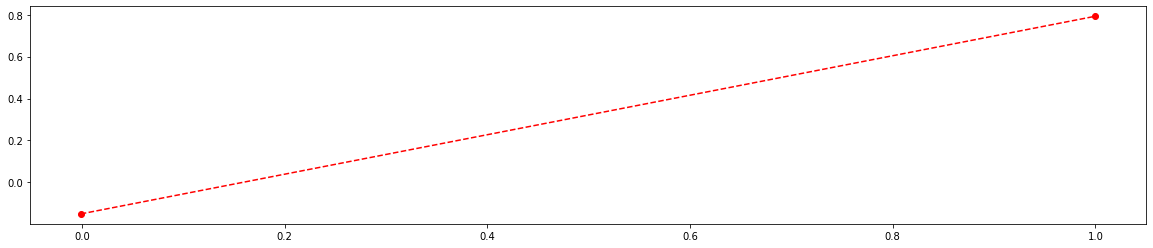

El "IV score" es = 0.11787195928083596


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1578  331     1909     0.897      0.772 -0.150 0.019
 (1.0, 165.0]    182   98      280     0.103      0.228  0.793 0.099,
 0.11787195928083596)

In [43]:
calc_woe_and_iv(df_train,df_train_label,'v30',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v31 con 7 rangos


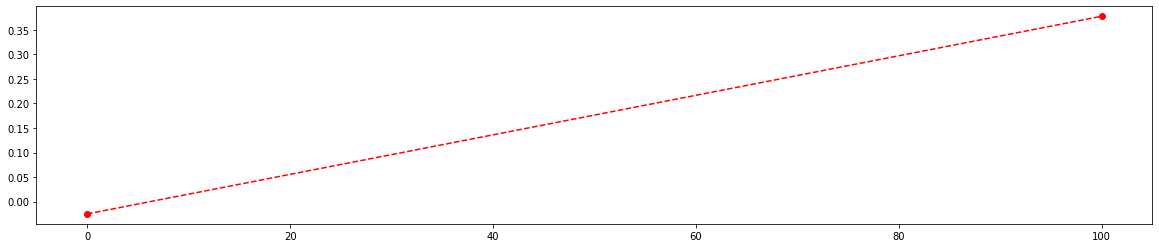

El "IV score" es = 0.009442538754091572


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v31                                                          
 0.000    1670  397     2067     0.949      0.925 -0.025 0.001
 100.000    90   32      122     0.051      0.075  0.378 0.009,
 0.009442538754091572)

In [44]:
calc_woe_and_iv(df_train,df_train_label,'v31',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v32 con 7 rangos


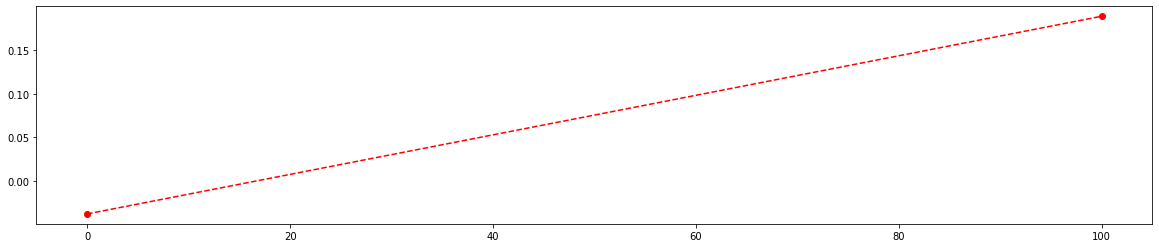

El "IV score" es = 0.0070648207206965765


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v32                                                          
 0.000    1495  351     1846     0.849      0.818 -0.037 0.001
 100.000   265   78      343     0.151      0.182  0.189 0.006,
 0.0070648207206965765)

In [45]:
calc_woe_and_iv(df_train,df_train_label,'v32',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v33 con 10 rangos


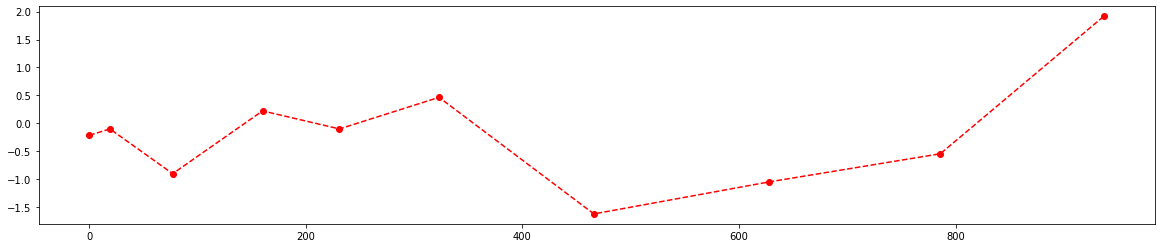

El "IV score" es = 0.8359011070287994


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 19.0]   189   37      226     0.107      0.086 -0.219 0.005
 (19.0, 77.0]     182   40      222     0.103      0.093 -0.104 0.001
 (77.0, 160.0]    193   19      212     0.110      0.044 -0.907 0.059
 (160.0, 231.0]   168   51      219     0.095      0.119  0.219 0.005
 (231.0, 323.0]   182   40      222     0.103      0.093 -0.104 0.001
 (323.0, 466.0]   155   60      215     0.088      0.140  0.463 0.024
 (466.0, 628.0]   209   10      219     0.119      0.023 -1.628 0.155
 (628.0, 786.0]   200   17      217     0.114      0.040 -1.053 0.078
 (786.0, 937.0]   206   29      235     0.117      0.068 -0.549 0.027
 (937.0, 1286.0]   76  126      202     0.043      0.294  1.917 0.480,
 0.8359011070287994)

In [46]:
calc_woe_and_iv(df_train,df_train_label,'v33',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v34 con 10 rangos


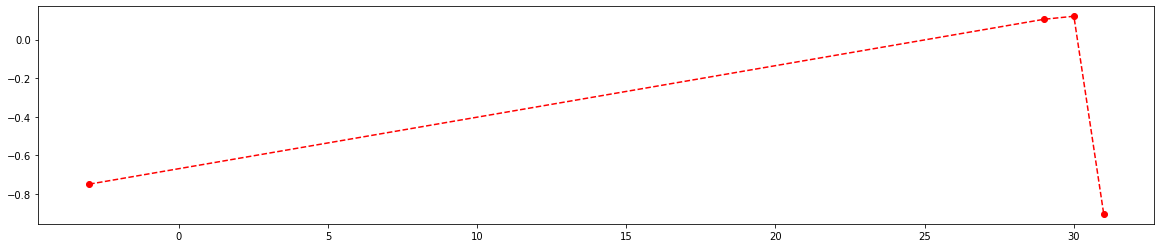

El "IV score" es = 0.09092293826180195


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-3.001, 29.0]  243   28      271     0.138      0.065 -0.749 0.055
 (29.0, 30.0]    469  127      596     0.266      0.296  0.105 0.003
 (30.0, 31.0]    967  266     1233     0.549      0.620  0.121 0.009
 (31.0, 731.0]    81    8       89     0.046      0.019 -0.903 0.025,
 0.09092293826180195)

In [47]:
calc_woe_and_iv(df_train,df_train_label,'v34',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v35 con 10 rangos


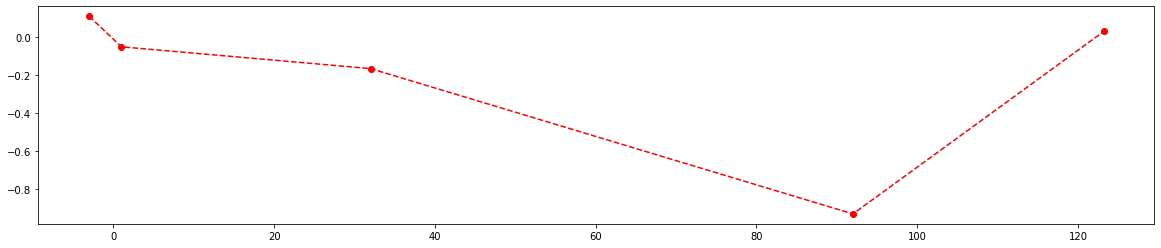

El "IV score" es = 0.061201850306373054


(output              0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                
 (-3.001, 1.0]    1083  295     1378     0.615      0.688  0.111 0.008
 (1.0, 32.0]       138   32      170     0.078      0.075 -0.050 0.000
 (32.0, 92.0]      208   43      251     0.118      0.100 -0.165 0.003
 (92.0, 123.2]     156   15      171     0.089      0.035 -0.930 0.050
 (123.2, 1280.0]   175   44      219     0.099      0.103  0.031 0.000,
 0.061201850306373054)

In [48]:
calc_woe_and_iv(df_train,df_train_label,'v35',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v36 con 10 rangos


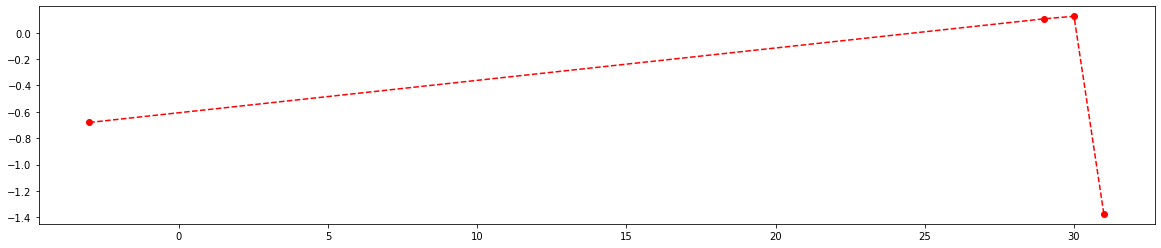

El "IV score" es = 0.10575487301912107


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-3.001, 29.0]  243   30      273     0.138      0.070 -0.680 0.046
 (29.0, 30.0]    469  127      596     0.266      0.296  0.105 0.003
 (30.0, 31.0]    967  267     1234     0.549      0.622  0.125 0.009
 (31.0, 731.0]    81    5       86     0.046      0.012 -1.373 0.047,
 0.10575487301912107)

In [49]:
calc_woe_and_iv(df_train,df_train_label,'v36',10) 

# Creación de las variables WoE e Information Value

In [50]:
def assign_woe(x,woe_df):
  n_columns = woe_df.shape[1]
  n_rows = woe_df.shape[0]

  for i in range(n_rows):
    x = float(x)
    if not isinstance(woe_df.index[i],float):
      left = float(woe_df.index[i].left)
      right = float(woe_df.index[i].right)
      if left < x and x <= right:
        return woe_df.woe[i]
      else:
        continue
    else:
      if x == float(woe_df.index[i]):
        return woe_df.iloc[i,5]
      else: 
        continue


In [51]:
# necesita procesar continuos_vars, bins
bins = [50,10,20,10,10,10,10,200,19,10,10,10,15,60,60,20,10,15,10,10,20,20,20,12,15,15,10,10,10,10,7,7,7,10,10,10,10]
len(bins), len(continous_vars)

(37, 37)

In [52]:
def df_with_woe(df_train,df_train_label,continous_vars_list,bins_list):

  df_init_woe = df_train.copy(deep=True)
  df_init_iv = pd.DataFrame(columns=['Var_Name','IV_Rank','Predictive_Power'])

  for i,(var_name,bins) in enumerate(zip(continous_vars_list,bins_list)):
    var_prefix = "woe_"
    woe_var_df, iv_score = calc_woe_and_iv(df_init_woe,df_train_label,var_name,bins)

    df_init_woe[var_prefix+var_name] = df_init_woe[var_name].map(lambda x: assign_woe(x,woe_var_df))

    if iv_score < 0.02:
      pred_pow = 'useless'
    elif iv_score < 0.1:
      pred_pow = 'weak'
    elif iv_score < 0.3:
      pred_pow = 'medium'
    elif iv_score < 0.5:
      pred_pow = 'strong'
    else:
      pred_pow = 'suspicious'

    df_init_iv = df_init_iv.append({'IV_Rank': iv_score,'Predictive_Power':pred_pow, 'Var_Name':var_prefix+var_name}, ignore_index=True)
  
  return df_init_woe , df_init_iv

In [53]:
#Función definitiva para transformar los datos de tal forma que se pueda trabajar con sus WoE
def df_train_and_test_with_woe(df_train,df_train_label,continous_vars_list,bins_list,df_test):
  df_init_woe = df_train.copy(deep=True)
  df_out_woe = df_test.copy(deep=True)
  df_init_iv = pd.DataFrame(columns=['Var_Name','IV_Rank','Predictive_Power'])
  woe_vars = []

  for i,(var_name,bins) in enumerate(zip(continous_vars_list,bins_list)):
    var_prefix = "woe_"
    woe_var_df, iv_score = calc_woe_and_iv(df_init_woe,df_train_label,var_name,bins)
    woe_vars.append(var_prefix+var_name)

    df_init_woe[var_prefix+var_name] = df_init_woe[var_name].map(lambda x: assign_woe(x,woe_var_df))
    df_out_woe[var_prefix+var_name] = df_out_woe[var_name].map(lambda x: assign_woe(x,woe_var_df))

    if iv_score < 0.02:
      pred_pow = 'useless'
    elif iv_score < 0.1:
      pred_pow = 'weak'
    elif iv_score < 0.3:
      pred_pow = 'medium'
    elif iv_score < 0.5:
      pred_pow = 'strong'
    else:
      pred_pow = 'suspicious'

    df_init_iv = df_init_iv.append({'IV_Rank': iv_score,'Predictive_Power':pred_pow, 'Var_Name':var_prefix+var_name}, ignore_index=True)
  
  return df_init_woe , df_init_iv , df_out_woe, woe_vars

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v0 con 50 rangos


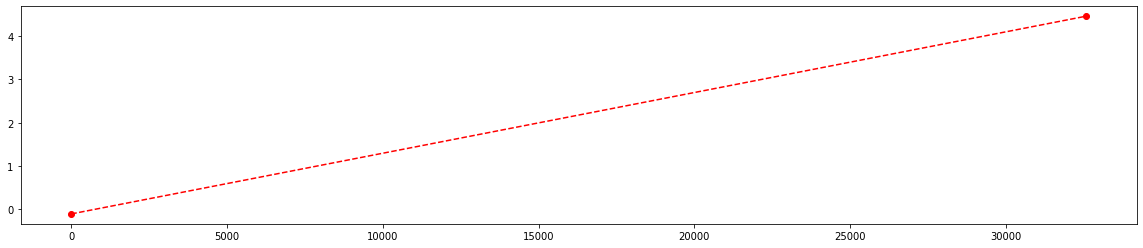

El "IV score" es = 0.4410611026217843
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v1 con 10 rangos


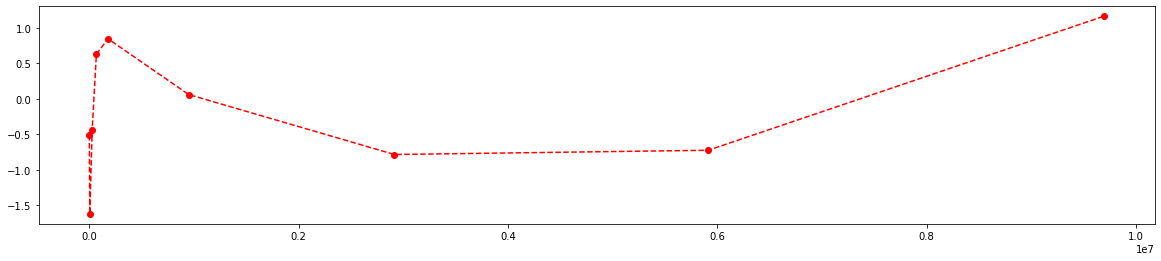

El "IV score" es = 0.6198777964580664
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v2 con 20 rangos


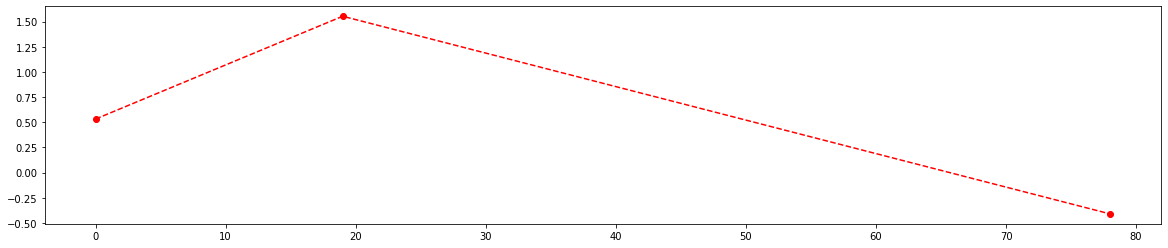

El "IV score" es = 0.49649929937901444
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v3 con 10 rangos


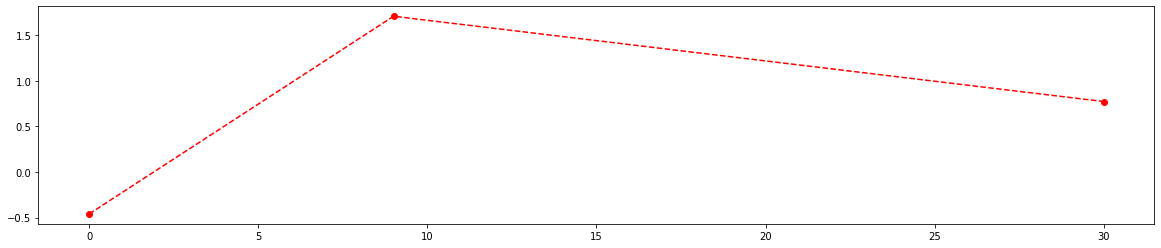

El "IV score" es = 0.6204585923582087
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v4 con 10 rangos


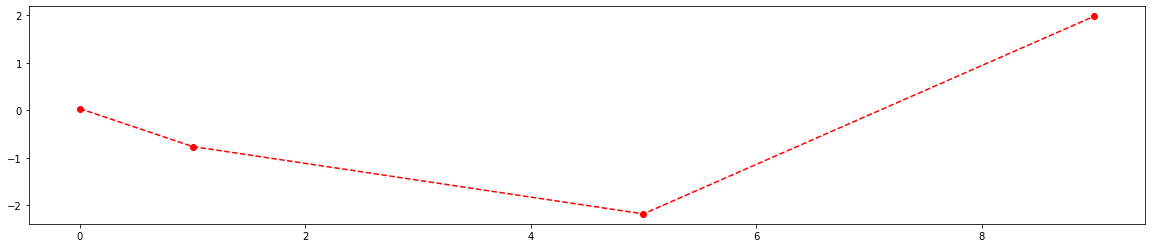

El "IV score" es = 0.8104760416735252
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v5 con 10 rangos


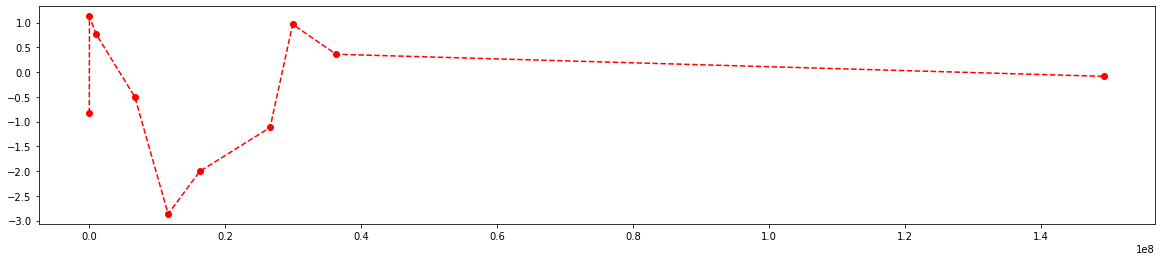

El "IV score" es = 1.0856023450802923
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v6 con 10 rangos


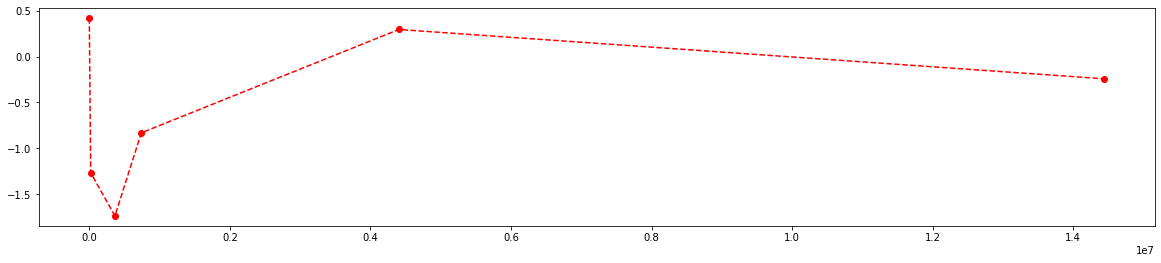

El "IV score" es = 0.4425238869535364
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v7 con 200 rangos


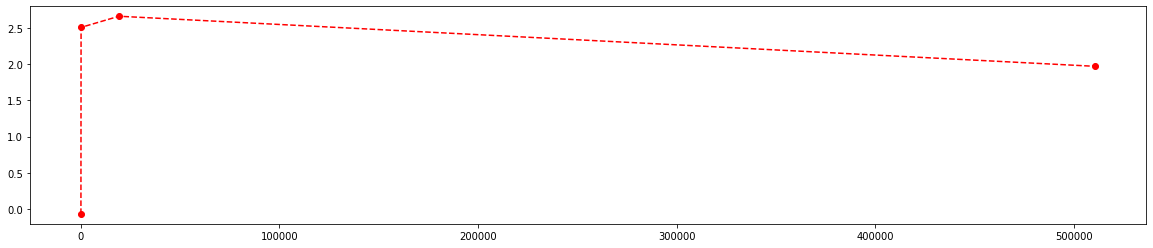

El "IV score" es = 0.16968816670039838
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v8 con 19 rangos


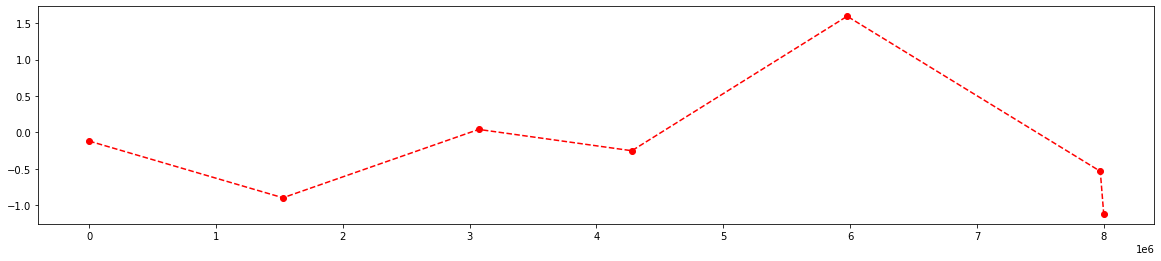

El "IV score" es = 0.42789850274585267
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v9 con 10 rangos


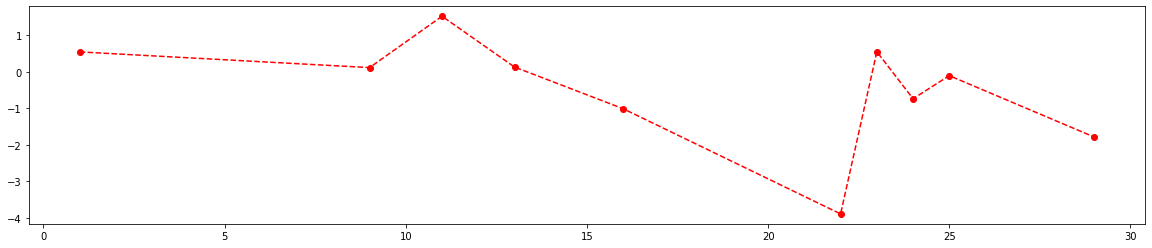

El "IV score" es = 0.8908376564483325
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v10 con 10 rangos


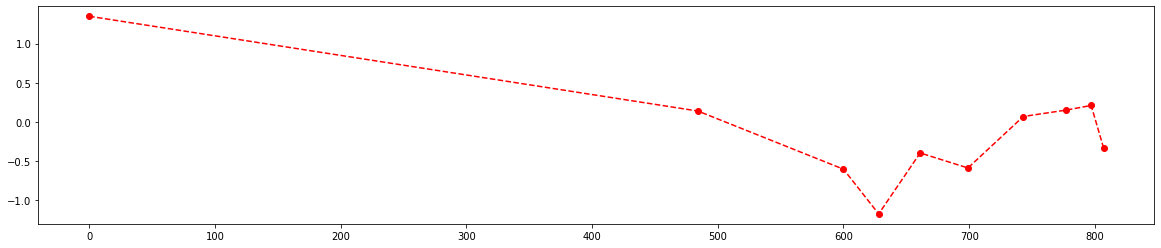

El "IV score" es = 0.4302410954839192
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v11 con 10 rangos


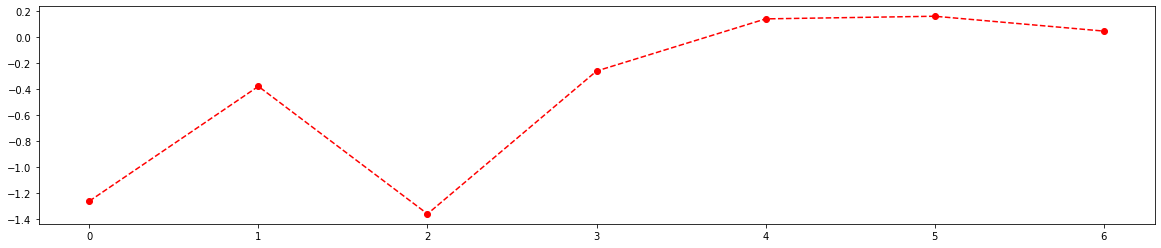

El "IV score" es = 0.057370937332350144
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v12 con 15 rangos


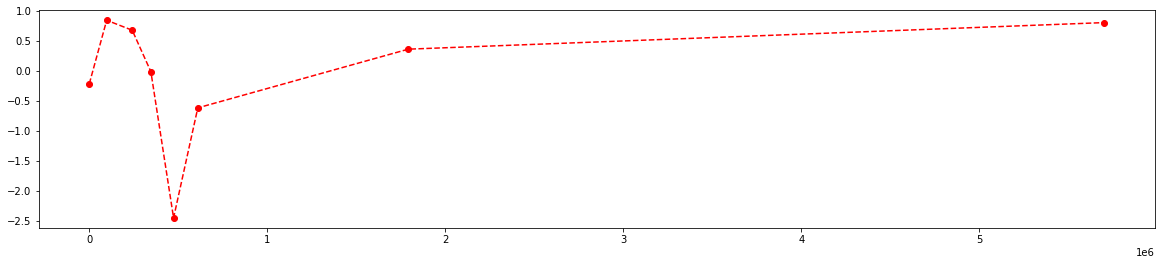

El "IV score" es = 0.38419410027678125
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v13 con 60 rangos


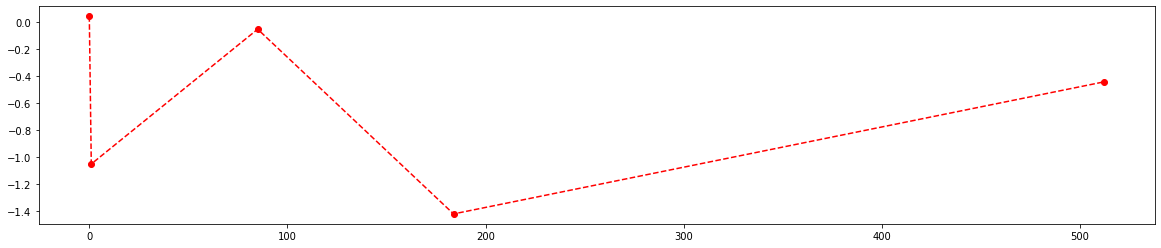

El "IV score" es = 0.04364895692467646
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v14 con 60 rangos


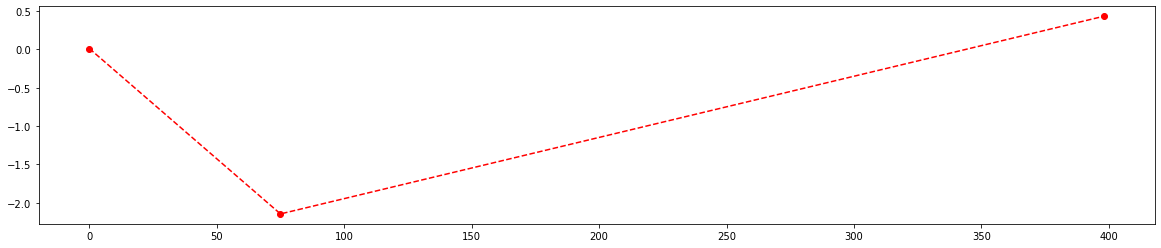

El "IV score" es = 0.040904500279323325
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v15 con 20 rangos


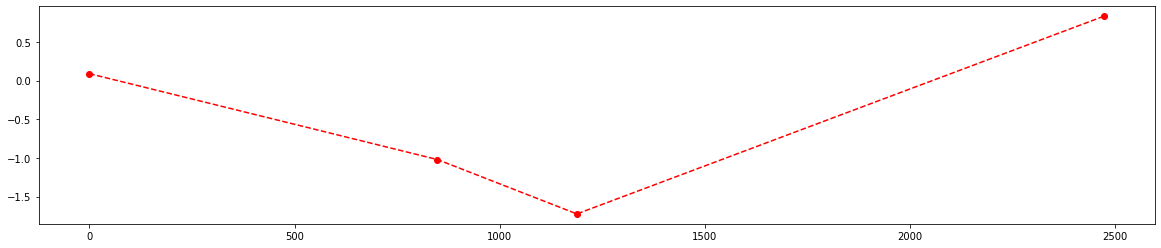

El "IV score" es = 0.1927484296685345
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v16 con 10 rangos


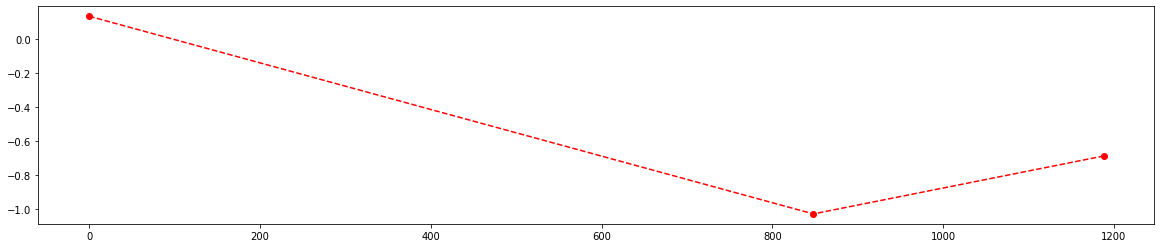

El "IV score" es = 0.12264554298194057
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v17 con 15 rangos


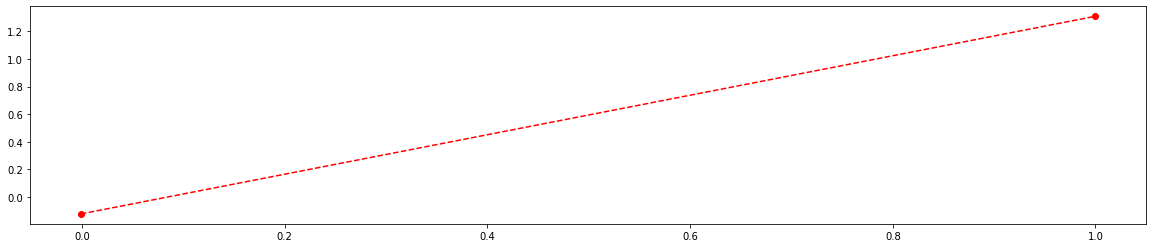

El "IV score" es = 0.15837316358046707
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v18 con 10 rangos


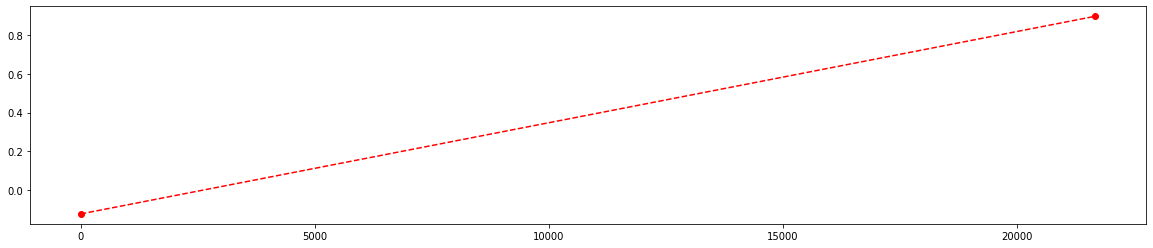

El "IV score" es = 0.10802995090427327
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v19 con 10 rangos


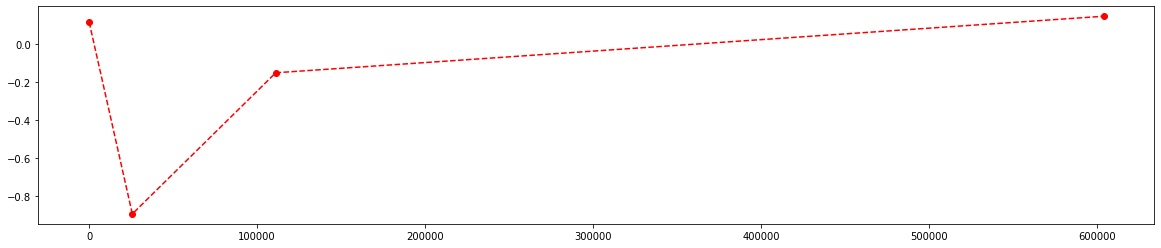

El "IV score" es = 0.07440333979880775
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v20 con 20 rangos


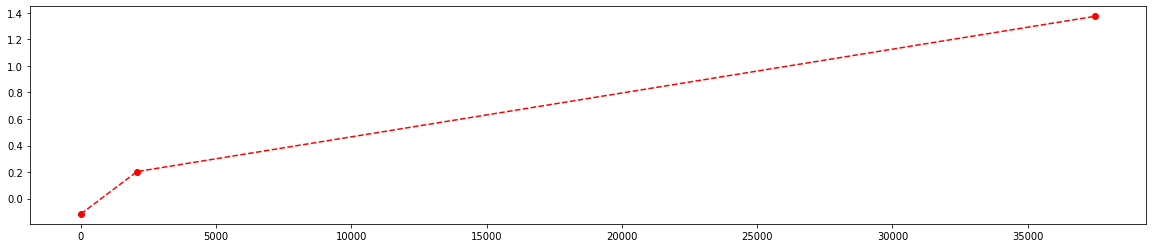

El "IV score" es = 0.13565513114220587
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v21 con 20 rangos


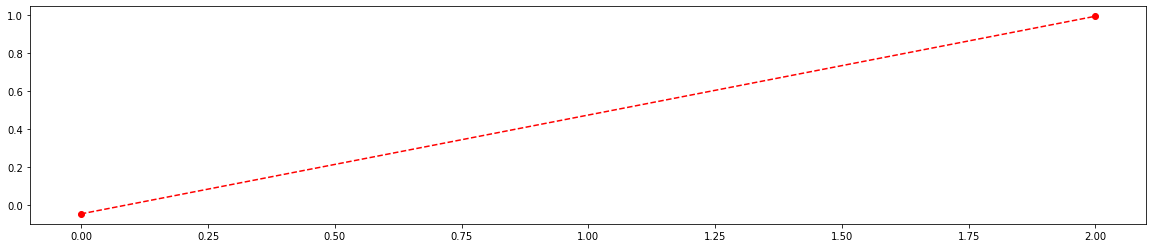

El "IV score" es = 0.047533183313123326
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v22 con 20 rangos


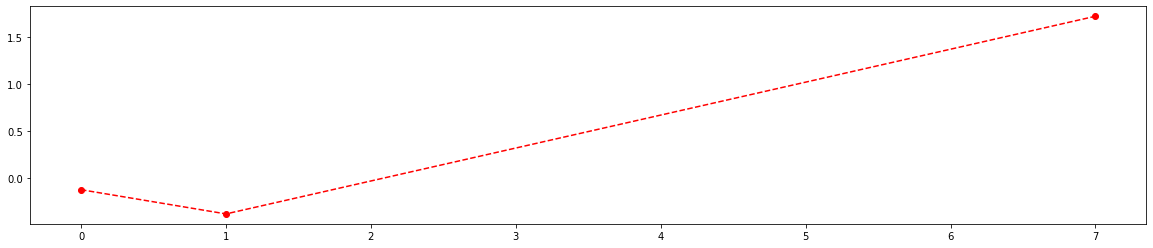

El "IV score" es = 0.22670777965747493
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v23 con 12 rangos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


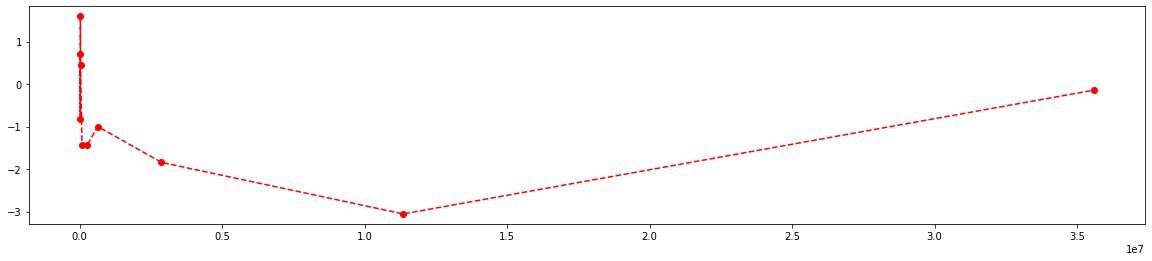

El "IV score" es = 1.2180463575595772
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v24 con 15 rangos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


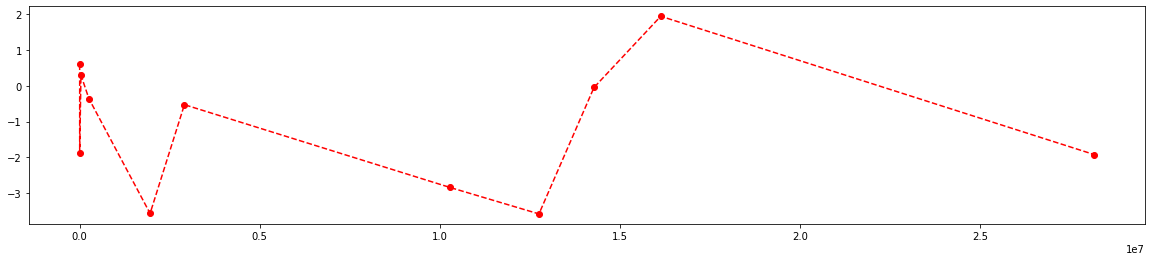

El "IV score" es = 1.5942500037416318
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v25 con 15 rangos


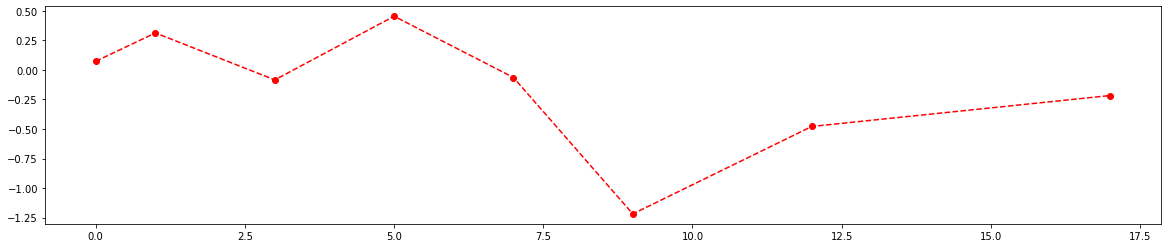

El "IV score" es = 0.09633845362859278
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v26 con 10 rangos


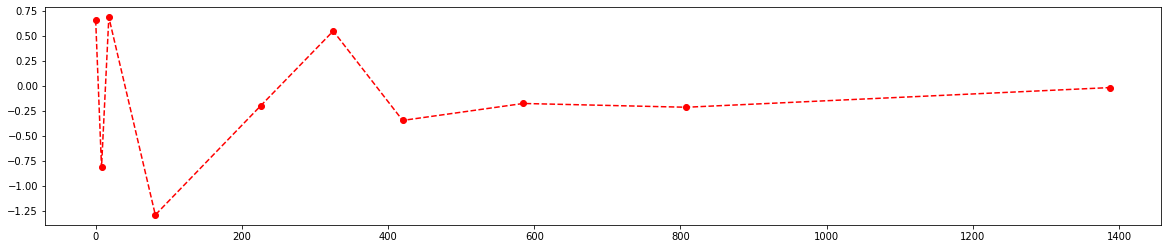

El "IV score" es = 0.3250474403952597
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v27 con 10 rangos


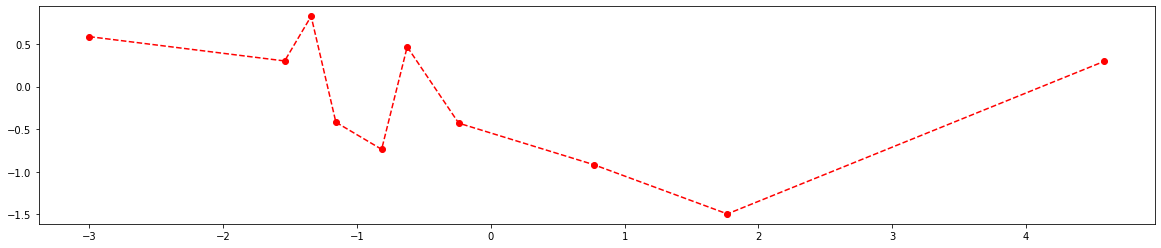

El "IV score" es = 0.4404037656096578
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v28 con 10 rangos


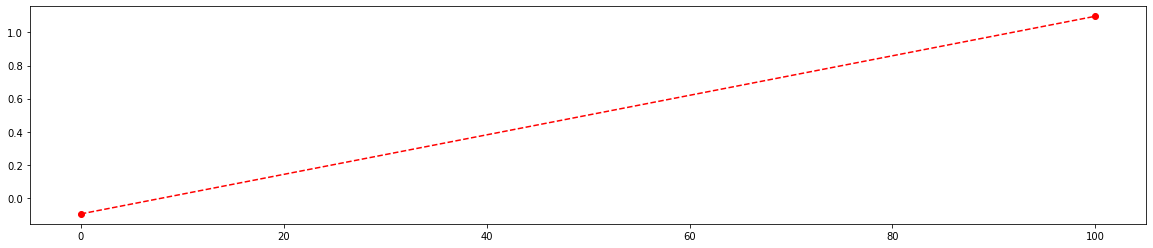

El "IV score" es = 0.105832593003581
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v29 con 10 rangos


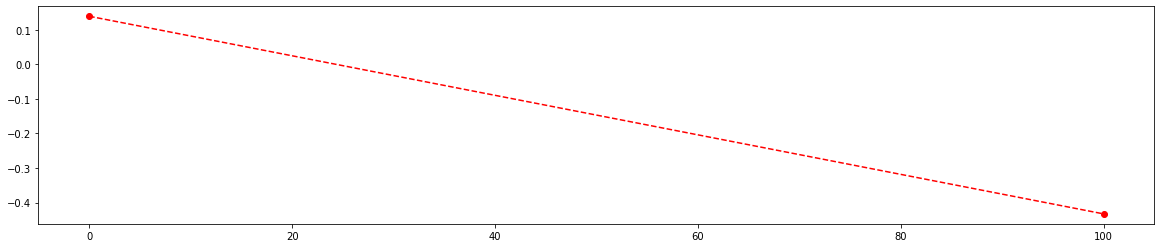

El "IV score" es = 0.0599761720686027
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v30 con 7 rangos


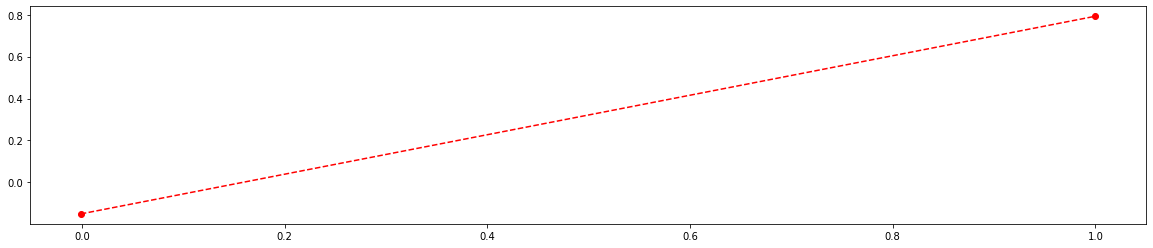

El "IV score" es = 0.11787195928083596
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v31 con 7 rangos


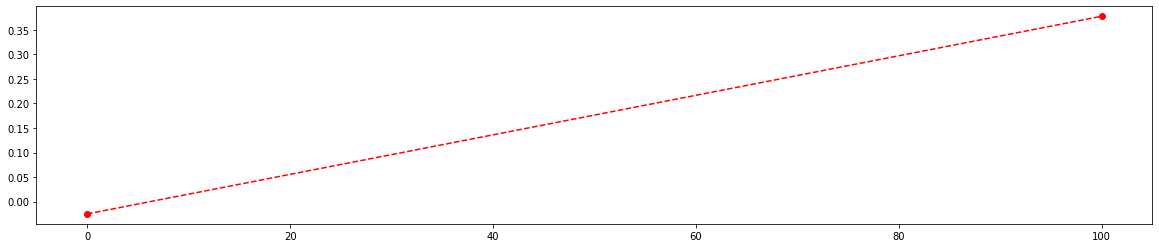

El "IV score" es = 0.009442538754091572
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v32 con 7 rangos


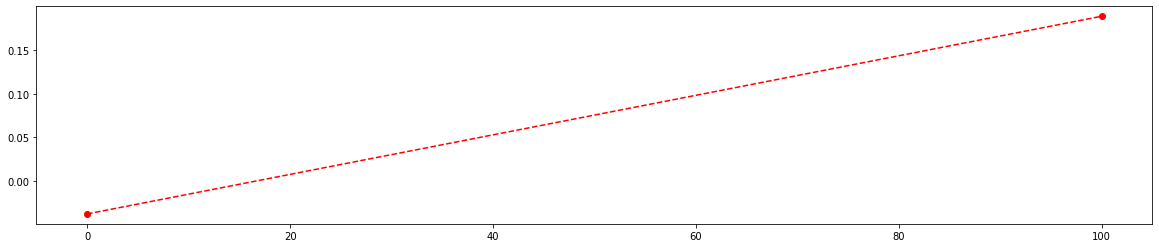

El "IV score" es = 0.0070648207206965765
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v33 con 10 rangos


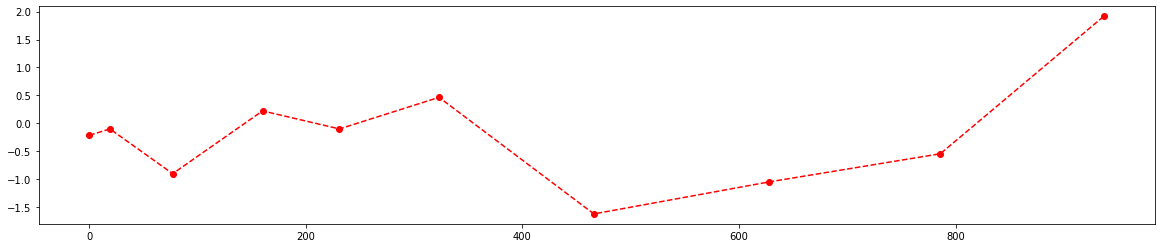

El "IV score" es = 0.8359011070287994
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v34 con 10 rangos


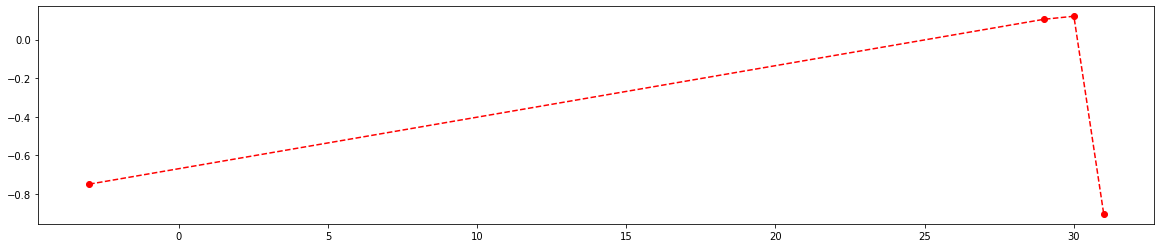

El "IV score" es = 0.09092293826180195
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v35 con 10 rangos


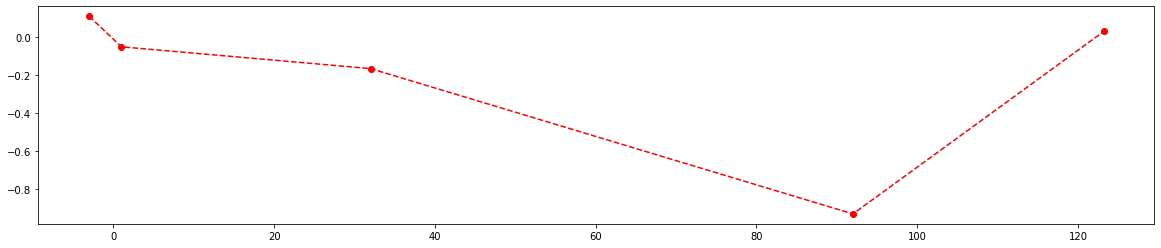

El "IV score" es = 0.061201850306373054
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v36 con 10 rangos


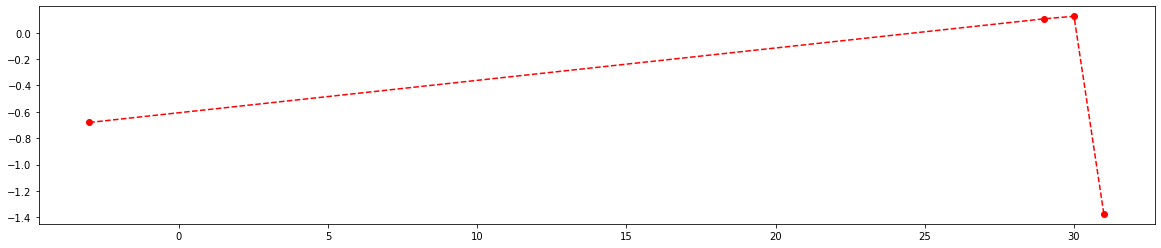

El "IV score" es = 0.10575487301912107


In [54]:
df_train_woe, df_train_iv, df_test_woe, woe_columns = df_train_and_test_with_woe(df_train,df_train_label,continous_vars,bins,df_test)

Clasificación de las variables en base a su IV

In [55]:
df_train_iv.where(df_train_iv['Predictive_Power'] == 'suspicious').dropna()

,Var_Name,IV_Rank,Predictive_Power
1,woe_v1,0.620,suspicious
3,woe_v3,0.620,suspicious
4,woe_v4,0.810,suspicious
5,woe_v5,1.086,suspicious
9,woe_v9,0.891,suspicious
23,woe_v23,1.218,suspicious
24,woe_v24,1.594,suspicious
33,woe_v33,0.836,suspicious


In [56]:
df_train_iv.where(df_train_iv['Predictive_Power'] == 'strong').dropna()

,Var_Name,IV_Rank,Predictive_Power
0,woe_v0,0.441,strong
2,woe_v2,0.496,strong
6,woe_v6,0.443,strong
8,woe_v8,0.428,strong
10,woe_v10,0.430,strong
12,woe_v12,0.384,strong
26,woe_v26,0.325,strong
27,woe_v27,0.440,strong


In [57]:
df_train_iv.where(df_train_iv['Predictive_Power'] == 'medium').dropna()

,Var_Name,IV_Rank,Predictive_Power
7,woe_v7,0.170,medium
15,woe_v15,0.193,medium
16,woe_v16,0.123,medium
17,woe_v17,0.158,medium
18,woe_v18,0.108,medium
20,woe_v20,0.136,medium
22,woe_v22,0.227,medium
28,woe_v28,0.106,medium
30,woe_v30,0.118,medium
36,woe_v36,0.106,medium


In [58]:
df_train_iv.where(df_train_iv['Predictive_Power'] == 'weak').dropna()

,Var_Name,IV_Rank,Predictive_Power
11,woe_v11,0.057,weak
13,woe_v13,0.044,weak
14,woe_v14,0.041,weak
19,woe_v19,0.074,weak
21,woe_v21,0.048,weak
25,woe_v25,0.096,weak
29,woe_v29,0.060,weak
34,woe_v34,0.091,weak
35,woe_v35,0.061,weak


In [59]:
df_train_iv.where(df_train_iv['Predictive_Power'] == 'useless').dropna()

,Var_Name,IV_Rank,Predictive_Power
31,woe_v31,0.009,useless
32,woe_v32,0.007,useless


## Detección de nan's
Tratamiento de los datos nulos que se hayan creado por la transformación del proceso anterior

### nan's en df_train

In [60]:
woe_columns

['woe_v0',
 'woe_v1',
 'woe_v2',
 'woe_v3',
 'woe_v4',
 'woe_v5',
 'woe_v6',
 'woe_v7',
 'woe_v8',
 'woe_v9',
 'woe_v10',
 'woe_v11',
 'woe_v12',
 'woe_v13',
 'woe_v14',
 'woe_v15',
 'woe_v16',
 'woe_v17',
 'woe_v18',
 'woe_v19',
 'woe_v20',
 'woe_v21',
 'woe_v22',
 'woe_v23',
 'woe_v24',
 'woe_v25',
 'woe_v26',
 'woe_v27',
 'woe_v28',
 'woe_v29',
 'woe_v30',
 'woe_v31',
 'woe_v32',
 'woe_v33',
 'woe_v34',
 'woe_v35',
 'woe_v36']

In [61]:
#df_train_just_woe.isnull().values.any()
for var in (woe_columns+non_continous_vars):
  print(var ,": ",df_train_woe[var].isnull().sum().sum())

woe_v0 :  0
woe_v1 :  0
woe_v2 :  0
woe_v3 :  0
woe_v4 :  0
woe_v5 :  0
woe_v6 :  0
woe_v7 :  0
woe_v8 :  0
woe_v9 :  0
woe_v10 :  0
woe_v11 :  0
woe_v12 :  0
woe_v13 :  0
woe_v14 :  0
woe_v15 :  0
woe_v16 :  0
woe_v17 :  0
woe_v18 :  0
woe_v19 :  0
woe_v20 :  0
woe_v21 :  0
woe_v22 :  0
woe_v23 :  0
woe_v24 :  0
woe_v25 :  0
woe_v26 :  0
woe_v27 :  10
woe_v28 :  0
woe_v29 :  0
woe_v30 :  0
woe_v31 :  0
woe_v32 :  0
woe_v33 :  0
woe_v34 :  0
woe_v35 :  0
woe_v36 :  0
tcs37 :  0
tcs38 :  0
tcs39 :  0
tcs40 :  0
tcs41 :  0
tcs42 :  0
tc43 :  0
tc44 :  0
tc45 :  0
tc46 :  0
tc47 :  0
tc48 :  0
tc49 :  0
tc50 :  0
tc51 :  0
tc52 :  0
tc53 :  0
dv54 :  0
ae55 :  0
ae56 :  0
ae57 :  0
ae58 :  0
ae59 :  0
ae60 :  0
ae61 :  0
ae62 :  0
ae63 :  0
ae64 :  0
ae65 :  0
ae66 :  0
ae67 :  0
ae68 :  0
d69 :  0
d70 :  0


In [62]:
df_train_woe[df_train_woe.isna().any(axis=1)]

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,...,ae68,d69,d70,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36
595,2189,0.000,0.000,100.000,0.000,0.000,536668.060,0.000,0.000,0.000,8.000,536.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,8.083,0.000,0.000,0.000,0.000,0.000,92,31.000,1.000,31.000,0,0,...,0,1,0,-0.102,-0.511,-0.410,-0.460,0.034,1.127,0.417,-0.071,-0.119,0.543,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.658,nan,-0.097,0.139,-0.150,-0.025,-0.037,-0.907,0.121,0.111,0.125
752,2882,0.000,61669.850,100.000,0.000,0.000,522496.870,0.000,0.000,0.000,8.000,533.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,8.083,0.000,0.000,0.000,0.000,0.000,184,31.000,1.000,31.000,0,0,...,0,1,0,-0.102,-0.439,-0.410,-0.460,0.034,1.127,0.417,-0.071,-0.119,0.543,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.658,nan,-0.097,0.139,-0.150,-0.025,-0.037,0.219,0.121,0.111,0.125
755,820,0.000,36580.100,100.000,0.000,0.000,555128.700,0.000,0.000,0.000,8.000,532.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,8.083,0.000,0.000,0.000,0.000,0.000,122,30.000,1.000,30.000,0,0,...,0,1,0,-0.102,-0.439,-0.410,-0.460,0.034,1.127,0.417,-0.071,-0.119,0.543,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.658,nan,-0.097,0.139,-0.150,-0.025,-0.037,-0.907,0.105,0.111,0.105
1139,2442,0.000,86368.310,100.000,0.000,5.000,9174515.860,171761.680,0.000,0.000,11.000,600.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,604199.980,0.000,0.000,2.000,4772422.736,0.000,0.000,9.000,8.083,0.000,0.000,2.000,0.000,100.000,231,30.000,93.000,30.000,0,1,...,0,0,0,-0.102,0.627,-0.410,-0.460,-0.765,-0.503,-1.267,-0.071,-0.119,0.112,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.380,-1.841,0.597,0.073,-0.814,nan,-0.097,0.139,0.793,-0.025,0.189,0.219,0.105,-0.930,0.105
1218,108,0.000,254301.520,100.000,0.000,5.000,9174515.860,171761.680,0.000,0.000,11.000,600.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,604199.980,0.000,0.000,2.000,4772422.736,0.000,0.000,9.000,8.083,0.000,0.000,2.000,0.000,100.000,231,30.000,93.000,30.000,0,1,...,0,0,0,-0.102,0.847,-0.410,-0.460,-0.765,-0.503,-1.267,-0.071,-0.119,0.112,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.380,-1.841,0.597,0.073,-0.814,nan,-0.097,0.139,0.793,-0.025,0.189,0.219,0.105,-0.930,0.105
1400,2715,0.000,195244.550,100.000,0.000,5.000,9174515.860,171761.680,0.000,0.000,11.000,600.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,604199.980,0.000,0.000,2.000,4772422.736,0.000,0.000,9.000,8.083,0.000,0.000,2.000,0.000,100.000,231,30.000,93.000,30.000,0,1,...,0,0,0,-0.102,0.847,-0.410,-0.460,-0.765,-0.503,-1.267,-0.071,-0.119,0.112,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.380,-1.841,0.597,0.073,-0.814,nan,-0.097,0.139,0.793,-0.025,0.189,0.219,0.105,-0.930,0.105
1416,643,0.000,36580.100,100.000,0.000,0.000,522496.870,0.000,0.000,0.000,8.000,533.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,8.083,0.000,0.000,0.000,0.000,0.000,184,31.000,1.000,31.000,0,0,...,0,1,0,-0.102,-0.439,-0.410,-0.460,0.034,1.127,0.417,-0.071,-0.119,0.543,0.139,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.658,nan,-0.097,0.139,-0.150,-0.025,-0.037,0.219,0.121,0.111,0.125
17

In [63]:
#el valor a rellenar es en base al WoE obtenido para determinado rango en determinada variable
df_train_woe['woe_v27'].fillna(value=0.295,inplace=True)
df_train_woe.head()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,...,ae68,d69,d70,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36
0,1651,0.000,143270.100,100.000,0.000,0.000,63090564.440,4199850.000,0.000,6240000.000,17.000,643.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,325907.704,15266089.960,8.000,1020.000,-0.634,0.000,0.000,0.000,0.000,0.000,132,31.000,1.000,31.000,0,1,...,0,0,0,-0.102,0.627,-0.410,-0.460,0.034,0.359,-0.832,-0.071,1.596,-1.015,-1.174,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,-1.439,-0.046,-0.064,-0.214,-0.736,-0.097,0.139,-0.150,-0.025,-0.037,-0.907,0.121,0.111,0.125
1,1370,0.000,1403461.970,90.000,10.000,29.000,8013913.780,8177030.690,44951.900,0.000,12.000,475.000,6.000,5700426.250,0.000,0.000,20223.000,0.000,2.000,62781.080,0.000,62781.080,2.000,0.000,0.000,0.000,4.000,1290.000,6.700,100.000,0.000,2.000,100.000,0.000,228,31.000,1.000,31.000,0,1,...,0,0,0,-0.102,0.059,-0.410,1.707,1.978,-0.503,0.295,2.664,-0.119,1.520,1.348,0.045,0.358,0.041,0.011,0.831,0.137,1.309,0.896,0.114,1.373,-0.048,-0.122,0.706,0.597,-0.084,-0.214,0.295,1.098,0.139,0.793,0.378,-0.037,0.219,0.121,0.111,0.125
2,2649,19800.240,63401.410,100.000,0.000,0.000,323384.600,67610.220,0.000,0.000,4.000,634.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,-0.504,0.000,0.000,0.000,0.000,0.000,64,31.000,1.000,31.000,0,0,...,0,1,0,-0.102,-0.439,-0.410,-0.460,0.034,1.127,-1.267,-0.071,-0.119,0.543,-1.174,0.159,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.658,0.466,-0.097,0.139,-0.150,-0.025,-0.037,-0.104,0.121,0.111,0.125
3,564,0.000,10585032.220,100.000,0.000,5.000,29596681.950,186964.540,0.000,4500000.000,11.000,649.000,6.000,3219970.310,0.000,0.000,0.000,0.000,0.000,0.000,604199.980,0.000,0.000,0.000,25190001.070,2559635.980,8.000,18.000,-1.970,0.000,0.000,0.000,0.000,0.000,720,31.000,1.000,31.000,0,1,...,0,0,0,-0.102,1.164,-0.410,-0.460,-0.765,-1.119,-1.267,-0.071,-0.252,0.112,-1.174,0.045,0.358,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.122,-3.054,-3.565,-0.064,-0.814,0.586,-0.097,0.139,-0.150,-0.025,-0.037,-1.053,0.121,0.111,0.125
4,2728,0.000,11259663.090,78.000,22.000,0.000,33626595.710,0.000,0.000,3972827.700,24.000,795.000,6.000,247181.790,0.000,0.000,848.000,848.000,0.000,0.000,0.000,0.000,0.000,0.000,30846.513,16134256.080,0.000,487.000,-1.288,0.000,100.000,0.000,0.000,0.000,968,31.000,1.000,31.000,0,1,...,0,0,0,-0.102,1.164,1.553,1.707,0.034,0.964,0.417,-0.071,0.041,0.547,0.150,0.045,0.673,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,1.598,-0.046,0.073,-0.346,0.825,-0.097,-0.433,-0.150,-0.025,-0.037,1.917,0.121,0.111,0.125


### nan's en df_test

In [64]:
for var in (woe_columns+non_continous_vars):
  print(var ,": ",df_test_woe[var].isnull().sum().sum())

woe_v0 :  1
woe_v1 :  3
woe_v2 :  0
woe_v3 :  0
woe_v4 :  0
woe_v5 :  0
woe_v6 :  0
woe_v7 :  0
woe_v8 :  0
woe_v9 :  0
woe_v10 :  0
woe_v11 :  0
woe_v12 :  0
woe_v13 :  1
woe_v14 :  0
woe_v15 :  0
woe_v16 :  0
woe_v17 :  0
woe_v18 :  0
woe_v19 :  0
woe_v20 :  0
woe_v21 :  0
woe_v22 :  0
woe_v23 :  1
woe_v24 :  0
woe_v25 :  0
woe_v26 :  0
woe_v27 :  0
woe_v28 :  0
woe_v29 :  0
woe_v30 :  0
woe_v31 :  0
woe_v32 :  0
woe_v33 :  0
woe_v34 :  0
woe_v35 :  0
woe_v36 :  1
tcs37 :  0
tcs38 :  0
tcs39 :  0
tcs40 :  0
tcs41 :  0
tcs42 :  0
tc43 :  0
tc44 :  0
tc45 :  0
tc46 :  0
tc47 :  0
tc48 :  0
tc49 :  0
tc50 :  0
tc51 :  0
tc52 :  0
tc53 :  0
dv54 :  0
ae55 :  0
ae56 :  0
ae57 :  0
ae58 :  0
ae59 :  0
ae60 :  0
ae61 :  0
ae62 :  0
ae63 :  0
ae64 :  0
ae65 :  0
ae66 :  0
ae67 :  0
ae68 :  0
d69 :  0
d70 :  0


In [65]:
df_test_woe[df_test_woe.isna().any(axis=1)]

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,...,ae68,d69,d70,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36
119,90,0.000,12635787.880,78.000,22.000,0.000,36054993.540,0.000,0.000,7972827.700,24.000,803.000,6.000,399264.090,0.000,0.000,848.000,848.000,0.000,0.000,0.000,0.000,0.000,0.000,30846.513,17242156.220,0.000,353.000,-1.303,0.000,100.000,0.000,0.000,0.000,999,31.000,1.000,31.000,0,1,...,0,0,0,-0.102,nan,1.553,1.707,0.034,0.964,0.417,-0.071,1.596,0.547,0.210,0.045,-0.017,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,1.598,1.944,0.073,0.548,0.825,-0.097,-0.433,-0.150,-0.025,-0.037,1.917,0.121,0.111,0.125
210,331,0.000,12619102.460,78.000,22.000,0.000,36292514.510,0.000,0.000,7972827.700,24.000,778.000,6.000,264695.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27599.542,17559177.120,0.000,343.000,-1.332,0.000,0.000,0.000,0.000,0.000,1029,30.000,1.000,30.000,0,1,...,0,0,0,-0.102,nan,1.553,1.707,0.034,0.964,0.417,-0.071,1.596,0.547,0.150,0.045,0.673,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,1.598,1.944,0.073,0.548,0.825,-0.097,0.139,-0.150,-0.025,-0.037,1.917,0.105,0.111,0.105
300,2529,0.000,25488.100,100.000,0.000,0.000,53997.080,2296704.100,0.000,0.000,75.000,793.000,6.000,0.000,6685.000,0.000,0.000,6685.000,2.000,10224.920,0.000,3922.440,2.000,0.000,1823809.058,0.000,0.000,184.000,5.014,0.000,100.000,2.000,100.000,0.000,16,30.000,1.000,30.000,0,1,...,0,0,0,-0.102,-1.623,-0.410,-0.460,0.034,1.127,-0.832,-0.071,-0.119,-1.790,0.150,0.045,-0.218,nan,0.011,0.089,-0.688,1.309,-0.122,0.114,0.204,-0.048,-0.122,-0.998,0.597,0.073,-1.292,0.295,-0.097,-0.433,0.793,0.378,-0.037,-0.219,0.105,0.111,0.105
340,1108,0.000,0.000,100.000,0.000,0.000,1886307145.090,287322221.370,0.000,0.000,52.000,664.000,6.000,40206830.030,0.000,1298.000,559330.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1475956287.443,333086342.533,16.000,2566.000,0.399,100.000,0.000,0.000,0.000,0.000,2,31.000,1.000,31.000,1,0,...,0,0,0,-0.102,-0.511,-0.410,-0.460,0.034,-0.087,-0.243,-0.071,-0.119,-1.790,-0.396,0.045,0.800,0.041,0.431,0.831,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,nan,-1.921,-0.478,-0.018,-0.429,1.098,0.139,-0.150,-0.025,-0.037,-0.219,0.121,0.111,0.125
344,679,0.000,0.000,100.000,0.000,0.000,8263355.390,3992365.130,0.000,6603838.400,21.000,775.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,423967.200,0.000,0.000,3.000,1281905.919,5000.000,9.000,369.000,-1.657,0.000,0.000,3.000,0.000,100.000,11,90.000,60.000,1155.000,0,1,...,0,0,0,-0.102,-0.511,-0.410,-0.460,0.034,-0.503,-0.832,-0.071,1.596,-1.015,0.069,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.380,-0.998,-1.890,-0.064,0.548,0.586,-0.097,0.139,0.793,-0.025,0.189,-0.219,-0.903,-0.165,nan
484,2859,5905906.276,7095556.170,78.000,22.000,4.000,31465036.630,0.000,0.000,7972827.700,24.000,669.000,6.000,245608.870,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23956.342,18705420.750,7.000,325.000,-1.740,0.000,0.000,0.000,0.000,0.000,1211,31.000,1.000,31.000,0,1,...,0,0,0,nan,-0.726,1.553,1.707,-0.765,0.964,0.417,-0.071,1.596,0.547,-0.396,0.045,0.673,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,-0.815,1.944,0.454,-0.198,0.586,-0.097,0.139,-0.150,-0.025,-0.037,1.917,0.121,0.111,0.125
522,806,0.000,12619102.460,78.000,22.000,0.000,36292514.510,0.000,0.000,7972827.700,24.000,778.000,6.000,264695.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27599.542,17559177.120,0.000,343.000,-1.332,0.000,0.000,0.000,0.000,0.000,1029,30.000,1.000,30.000,0,1,...,0,0,0,-0.102,nan,1.553,1.707,0.034,0.964,0.417,-0.071,1.596,0.547,0.150,

In [66]:
df_test_woe.loc[[119,210,522],['v1','woe_v1']]

,v1,woe_v1
119,12635787.880,nan
210,12619102.460,nan
522,12619102.460,nan


In [67]:
df_test_woe['woe_v1'].fillna(value=1.164,inplace=True) # valor a reemplazar # 1.164 
df_test_woe[df_test_woe.isna().any(axis=1)]

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,...,ae68,d69,d70,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36
300,2529,0.000,25488.100,100.000,0.000,0.000,53997.080,2296704.100,0.000,0.000,75.000,793.000,6.000,0.000,6685.000,0.000,0.000,6685.000,2.000,10224.920,0.000,3922.440,2.000,0.000,1823809.058,0.000,0.000,184.000,5.014,0.000,100.000,2.000,100.000,0.000,16,30.000,1.000,30.000,0,1,...,0,0,0,-0.102,-1.623,-0.410,-0.460,0.034,1.127,-0.832,-0.071,-0.119,-1.790,0.150,0.045,-0.218,nan,0.011,0.089,-0.688,1.309,-0.122,0.114,0.204,-0.048,-0.122,-0.998,0.597,0.073,-1.292,0.295,-0.097,-0.433,0.793,0.378,-0.037,-0.219,0.105,0.111,0.105
340,1108,0.000,0.000,100.000,0.000,0.000,1886307145.090,287322221.370,0.000,0.000,52.000,664.000,6.000,40206830.030,0.000,1298.000,559330.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1475956287.443,333086342.533,16.000,2566.000,0.399,100.000,0.000,0.000,0.000,0.000,2,31.000,1.000,31.000,1,0,...,0,0,0,-0.102,-0.511,-0.410,-0.460,0.034,-0.087,-0.243,-0.071,-0.119,-1.790,-0.396,0.045,0.800,0.041,0.431,0.831,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,nan,-1.921,-0.478,-0.018,-0.429,1.098,0.139,-0.150,-0.025,-0.037,-0.219,0.121,0.111,0.125
344,679,0.000,0.000,100.000,0.000,0.000,8263355.390,3992365.130,0.000,6603838.400,21.000,775.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,423967.200,0.000,0.000,3.000,1281905.919,5000.000,9.000,369.000,-1.657,0.000,0.000,3.000,0.000,100.000,11,90.000,60.000,1155.000,0,1,...,0,0,0,-0.102,-0.511,-0.410,-0.460,0.034,-0.503,-0.832,-0.071,1.596,-1.015,0.069,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.380,-0.998,-1.890,-0.064,0.548,0.586,-0.097,0.139,0.793,-0.025,0.189,-0.219,-0.903,-0.165,nan
484,2859,5905906.276,7095556.170,78.000,22.000,4.000,31465036.630,0.000,0.000,7972827.700,24.000,669.000,6.000,245608.870,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23956.342,18705420.750,7.000,325.000,-1.740,0.000,0.000,0.000,0.000,0.000,1211,31.000,1.000,31.000,0,1,...,0,0,0,nan,-0.726,1.553,1.707,-0.765,0.964,0.417,-0.071,1.596,0.547,-0.396,0.045,0.673,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,-0.815,1.944,0.454,-0.198,0.586,-0.097,0.139,-0.150,-0.025,-0.037,1.917,0.121,0.111,0.125


In [68]:
df_test_woe['woe_v0'].fillna(value=4.456,inplace=True) # x= 5905906.276; valor a reemplazar 4.456
df_test_woe['woe_v13'].fillna(value=-0.445,inplace=True) # x= 6685.000; valor a reemplazar -0.445
df_test_woe['woe_v23'].fillna(value=-0.140,inplace=True) # x= 1475956287.443; valor a reemplazar -0.140
df_test_woe['woe_v36'].fillna(value=-1.373,inplace=True) # x= 1155.000; valor a reemplazar -1.373
df_test_woe[df_test_woe.isna().any(axis=1)]

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,...,ae68,d69,d70,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36


### revisión dataframes de trabajo
Los dataframes de trabajo son:<br>
>* df_train_just_woe<br>
* df_test_just_woe<br>
* df_train_scaled<br>
* df_test_scaled<br>
* df_train_label<br>
* df_test_label

In [69]:
df_train_just_woe = df_train_woe[["Unnamed: 0"]+woe_columns+non_continous_vars]
df_test_just_woe = df_test_woe[["Unnamed: 0"]+woe_columns+non_continous_vars]
df_train_just_woe.shape , df_test_just_woe.shape

((2189, 72), (548, 72))

In [127]:
df_train_just_woe.describe()

,Unnamed: 0,woe_v0,woe_v1,woe_v2,woe_v3,woe_v4,woe_v5,woe_v6,woe_v7,woe_v8,woe_v9,woe_v10,woe_v11,woe_v12,woe_v13,woe_v14,woe_v15,woe_v16,woe_v17,woe_v18,woe_v19,woe_v20,woe_v21,woe_v22,woe_v23,woe_v24,woe_v25,woe_v26,woe_v27,woe_v28,woe_v29,woe_v30,woe_v31,woe_v32,woe_v33,woe_v34,woe_v35,woe_v36,tcs37,tcs38,tcs39,tcs40,tcs41,tcs42,tc43,tc44,tc45,tc46,tc47,tc48,tc49,tc50,tc51,tc52,tc53,dv54,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000
mean,1457.218,-0.010,-0.191,-0.110,-0.135,-0.231,-0.415,-0.169,-0.021,-0.097,-0.396,-0.116,-0.023,-0.142,-0.017,-0.019,-0.073,-0.045,-0.033,-0.026,-0.027,-0.028,-0.011,-0.041,-0.429,-0.661,-0.035,-0.106,-0.149,-0.024,-0.020,-0.030,-0.003,-0.002,-0.213,-0.033,-0.022,-0.040,0.153,0.635,0.136,0.032,0.004,0.021,0.005,0.003,0.010,0.000,0.000,0.011,0.286,0.016,0.654,0.000,0.013,0.275,0.206,0.113,0.131,0.035,0.004,0.006,0.035,0.372,0.004,0.022,0.005,0.015,0.008,0.044,0.122,0.000
std,842.159,0.640,0.812,0.632,0.705,0.971,1.255,0.778,0.350,0.604,1.345,0.640,0.292,0.749,0.252,0.280,0.517,0.398,0.347,0.297,0.307,0.321,0.193,0.408,1.302,1.658,0.349,0.604,0.716,0.288,0.256,0.315,0.092,0.082,0.902,0.336,0.280,0.377,0.361,0.482,0.343,0.177,0.060,0.143,0.067,0.052,0.097,0.021,0.021,0.104,0.452,0.127,0.476,0.021,0.112,0.446,0.405,0.316,0.338,0.183,0.064,0.080,0.183,0.483,0.064,0.146,0.067,0.120,0.088,0.206,0.328,0.000
min,0.000,-0.102,-1.623,-0.410,-0.460,-2.184,-2.865,-1.738,-0.071,-1.120,-3.897,-1.174,-1.361,-2.453,-1.422,-2.144,-1.724,-1.031,-0.123,-0.122,-0.896,-0.115,-0.048,-0.380,-3.054,-3.579,-1.218,-1.292,-1.494,-0.097,-0.433,-0.150,-0.025,-0.037,-1.628,-0.903,-0.930,-1.373,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,731.000,-0.102,-0.726,-0.410,-0.460,-0.765,-1.119,-0.832,-0.071,-0.119,-1.015,-0.588,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,-0.152,-0.115,-0.048,-0.122,-1.433,-1.921,-0.084,-0.346,-0.736,-0.097,-0.433,-0.150,-0.025,-0.037,-0.907,0.105,-0.050,0.105,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1453.000,-0.102,-0.511,-0.410,-0.460,0.034,-0.087,0.417,-0.071,-0.119,0.112,0.069,0.045,-0.218,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,-0.140,-0.046,0.073,-0.177,0.295,-0.097,0.139,-0.150,-0.025,-0.037,-0.219,0.121,0.111,0.125,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2188.000,-0.102,0.627,-0.410,-0.460,0.034,0.773,0.417,-0.071,-0.119,0.543,0.150,0.045,0.358,0.041,0.011,0.089,0.137,-0.123,-0.122,0.114,-0.115,-0.048,-0.122,0.706,0.597,0.073,0.548,0.466,-0.097,0.139,-0.150,-0.025,-0.037,0.219,0.121,0.111,0.125,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2907.000,4.456,1.164,1.553,1.707,1.978,1.127,0.417,2.664,1.596,1.520,1.348,0.159,0.840,0.041,0.431,0.

In [71]:
df_train_partial = (df_train[continous_vars] - df_train[continous_vars].min()) / (df_train[continous_vars].max() - df_train[continous_vars].min())
df_test_partial = (df_test[continous_vars] - df_test[continous_vars].min()) / (df_test[continous_vars].max() - df_test[continous_vars].min())

In [72]:
df_train_scaled = pd.concat([df_train['Unnamed: 0'],df_train_partial,df_train[non_continous_vars]],axis=1)
df_test_scaled = pd.concat([df_test['Unnamed: 0'],df_test_partial,df_test[non_continous_vars]],axis=1)
df_train_scaled.shape, df_test_scaled.shape

((2189, 72), (548, 72))

In [128]:
df_train_scaled.describe()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,tcs39,tcs40,tcs41,tcs42,tc43,tc44,tc45,tc46,tc47,tc48,tc49,tc50,tc51,tc52,tc53,dv54,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000
mean,1457.218,0.006,0.199,0.871,0.103,0.020,0.022,0.023,0.005,0.228,0.175,0.718,0.938,0.031,0.008,0.002,0.004,0.004,0.025,0.005,0.029,0.007,0.007,0.011,0.009,0.021,0.116,0.024,0.308,0.062,0.278,0.012,0.056,0.157,0.328,0.051,0.030,0.051,0.153,0.635,0.136,0.032,0.004,0.021,0.005,0.003,0.010,0.000,0.000,0.011,0.286,0.016,0.654,0.000,0.013,0.275,0.206,0.113,0.131,0.035,0.004,0.006,0.035,0.372,0.004,0.022,0.005,0.015,0.008,0.044,0.122,0.000
std,842.159,0.055,0.295,0.295,0.259,0.046,0.092,0.095,0.063,0.328,0.115,0.164,0.220,0.150,0.065,0.026,0.040,0.038,0.108,0.045,0.088,0.051,0.044,0.052,0.047,0.066,0.172,0.070,0.220,0.241,0.448,0.051,0.229,0.364,0.268,0.051,0.047,0.045,0.361,0.482,0.343,0.177,0.060,0.143,0.067,0.052,0.097,0.021,0.021,0.104,0.452,0.127,0.476,0.021,0.112,0.446,0.405,0.316,0.338,0.183,0.064,0.080,0.183,0.483,0.064,0.146,0.067,0.120,0.088,0.206,0.328,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,731.000,0.000,0.001,1.000,0.000,0.000,0.001,0.000,0.000,0.000,0.088,0.652,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.154,0.000,0.000,0.000,0.000,0.000,0.094,0.045,0.003,0.045,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1453.000,0.000,0.014,1.000,0.000,0.000,0.005,0.000,0.000,0.000,0.184,0.747,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.008,0.214,0.000,0.000,0.000,0.000,0.000,0.251,0.046,0.003,0.046,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2188.000,0.000,0.315,1.000,0.000,0.027,0.010,0.006,0.000,0.436,0.202,0.845,1.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.021,0.000,0.000,0.000,0.002,0.021,0.184,0.016,0.396,0.000,1.000,0.000,0.000,0.000,0.562,0.046,0.051,0.046,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2907.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1

# Sampling

## Undersampling

In [130]:
from imblearn.under_sampling import RandomUnderSampler

In [131]:
rus = RandomUnderSampler(replacement=False)
Xwoe_train_undersampled, ywoe_train_undersampled = rus.fit_resample(df_train_just_woe[woe_columns+non_continous_vars],df_train_label)
print(df_train_just_woe.shape)
print(Xwoe_train_undersampled.shape)
ywoe_train_undersampled = pd.DataFrame(ywoe_train_undersampled)
pd.crosstab(ywoe_train_undersampled[0],columns='count')

(2189, 72)
(858, 71)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


col_0,count
0,
0.000,429
1.000,429


In [132]:
rus = RandomUnderSampler(replacement=False)
Xscaled_train_undersampled, yscaled_train_undersampled = rus.fit_resample(df_train_scaled[continous_vars+non_continous_vars],df_train_label)
print(df_train_scaled.shape)
print(Xscaled_train_undersampled.shape)
yscaled_train_undersampled = pd.DataFrame(yscaled_train_undersampled)
pd.crosstab(yscaled_train_undersampled[0],columns='count')

(2189, 72)
(858, 71)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


col_0,count
0,
0.000,429
1.000,429


## Oversampling

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
ros = RandomOverSampler()
Xwoe_train_oversampled, ywoe_train_oversampled = ros.fit_resample(df_train_just_woe[woe_columns+non_continous_vars],df_train_label)
print(df_train_just_woe.shape)
print(Xwoe_train_oversampled.shape)
ywoe_train_oversampled = pd.DataFrame(ywoe_train_oversampled)
pd.crosstab(ywoe_train_oversampled[0],columns='count')

(2189, 72)
(3520, 71)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


col_0,count
0,
0.000,1760
1.000,1760


In [135]:
ros = RandomOverSampler()
Xscaled_train_oversampled, yscaled_train_oversampled = ros.fit_resample(df_train_scaled[continous_vars+non_continous_vars],df_train_label)
print(df_train_scaled.shape)
print(Xscaled_train_oversampled.shape)
yscaled_train_oversampled = pd.DataFrame(yscaled_train_oversampled)
pd.crosstab(yscaled_train_oversampled[0],columns='count')

(2189, 72)
(3520, 71)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


col_0,count
0,
0.000,1760
1.000,1760


## SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
rSMOTE = SMOTE()
Xwoe_train_smote, ywoe_train_smote = rSMOTE.fit_resample(df_train_just_woe[woe_columns+non_continous_vars],df_train_label)
print(df_train_just_woe.shape)
print(Xwoe_train_smote.shape)
ywoe_train_smote = pd.DataFrame(ywoe_train_smote)
pd.crosstab(ywoe_train_smote[0],columns='count')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2189, 72)
(3520, 71)


col_0,count
0,
0.000,1760
1.000,1760


In [138]:
rSMOTE = SMOTE()
Xscaled_train_smote, yscaled_train_smote = rSMOTE.fit_resample(df_train_scaled[continous_vars+non_continous_vars],df_train_label)
print(df_train_scaled.shape)
print(Xscaled_train_smote.shape)
yscaled_train_smote = pd.DataFrame(yscaled_train_smote)
pd.crosstab(yscaled_train_smote[0],columns='count')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2189, 72)
(3520, 71)


col_0,count
0,
0.000,1760
1.000,1760


## SMOTE(Oversampling) + Undersampling

In [139]:
from imblearn.pipeline import Pipeline

In [140]:
rSMOTE = SMOTE()
rus = RandomUnderSampler()
steps = [('s', rSMOTE),('u', rus)]
pipeline = Pipeline(steps=steps)

Xwoe_train_2s, ywoe_train_2s = pipeline.fit_resample(df_train_just_woe[woe_columns+non_continous_vars],df_train_label)

print(df_train_just_woe.shape)
print(Xwoe_train_2s.shape)
ywoe_train_2s = pd.DataFrame(ywoe_train_2s)
pd.crosstab(ywoe_train_2s[0],columns='count')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2189, 72)
(3520, 71)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


col_0,count
0,
0.000,1760
1.000,1760


In [141]:
rSMOTE = SMOTE()
rus = RandomUnderSampler()
steps = [('s', rSMOTE),('u', rus)]
pipeline = Pipeline(steps=steps)

Xscaled_train_2s, yscaled_train_2s = pipeline.fit_resample(df_train_scaled[continous_vars+non_continous_vars],df_train_label)

print(df_train_scaled.shape)
print(Xscaled_train_2s.shape)
yscaled_train_2s = pd.DataFrame(yscaled_train_2s)
pd.crosstab(yscaled_train_2s[0],columns='count')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2189, 72)
(3520, 71)


col_0,count
0,
0.000,1760
1.000,1760


# Modeling

In [142]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import matplotlib.pyplot as plt

## DataFrame WoE UnderSampled

In [ ]:
lr_woe_US = LogisticRegressionCV(cv=10).fit(Xwoe_train_undersampled, ywoe_train_undersampled)
predictions_woe_US = lr_woe_US.predict(df_test_just_woe[woe_columns+non_continous_vars])
matrix_woe_US = metrics.confusion_matrix(df_test_label,predictions_woe_US)
probs_woe_US = lr_woe_US.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_US, sensit_woe_US, _ = metrics.roc_curve(df_test_label,probs_woe_US[:,1])

In [144]:
# TN|FP
# FN|TP
matrix_woe_US

array([[361,  79],
       [  9,  99]])

## DataFrame Scaled UnderSampled

In [ ]:
lr_scaled_US = LogisticRegressionCV(cv=10).fit(Xscaled_train_undersampled, yscaled_train_undersampled)
predictions_scaled_US = lr_scaled_US.predict(df_test_scaled[continous_vars+non_continous_vars])
matrix_scaled_US = metrics.confusion_matrix(df_test_label,predictions_scaled_US)
probs_scaled_US = lr_scaled_US.predict_proba(df_test_scaled[continous_vars+non_continous_vars])
espec_1_scaled_US, sensit_scaled_US, _ = metrics.roc_curve(df_test_label,probs_scaled_US[:,1])

In [146]:
matrix_scaled_US

array([[331, 109],
       [ 13,  95]])

## DataFrame WoE OverSampled

In [ ]:
lr_woe_OS = LogisticRegressionCV(cv=10).fit(Xwoe_train_oversampled, ywoe_train_oversampled)
predictions_woe_OS = lr_woe_OS.predict(df_test_just_woe[woe_columns+non_continous_vars])
matrix_woe_OS = metrics.confusion_matrix(df_test_label,predictions_woe_OS)
probs_woe_OS = lr_woe_OS.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_OS, sensit_woe_OS, _ = metrics.roc_curve(df_test_label,probs_woe_OS[:,1])

In [148]:
matrix_woe_OS

array([[370,  70],
       [  9,  99]])

## DataFrame Scaled OverSampled

In [ ]:
lr_scaled_OS = LogisticRegressionCV(cv=10).fit(Xscaled_train_oversampled, yscaled_train_oversampled)
predictions_scaled_OS = lr_scaled_OS.predict(df_test_scaled[continous_vars+non_continous_vars])
matrix_scaled_OS = metrics.confusion_matrix(df_test_label,predictions_scaled_OS)
probs_scaled_OS = lr_scaled_OS.predict_proba(df_test_scaled[continous_vars+non_continous_vars])
espec_1_scaled_OS, sensit_scaled_OS, _ = metrics.roc_curve(df_test_label,probs_scaled_OS[:,1])

In [150]:
matrix_scaled_OS

array([[354,  86],
       [ 11,  97]])

## DataFrame WoE SMOTE

In [ ]:
lr_woe_SMOTE = LogisticRegressionCV(cv=10).fit(Xwoe_train_smote, ywoe_train_smote)
predictions_woe_SMOTE = lr_woe_SMOTE.predict(df_test_just_woe[woe_columns+non_continous_vars])
matrix_woe_SMOTE = metrics.confusion_matrix(df_test_label,predictions_woe_SMOTE)
probs_woe_SMOTE = lr_woe_SMOTE.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_SMOTE, sensit_woe_SMOTE, _ = metrics.roc_curve(df_test_label,probs_woe_SMOTE[:,1])

In [152]:
matrix_woe_SMOTE

array([[366,  74],
       [ 11,  97]])

## DataFrame Scaled SMOTE

In [ ]:
lr_scaled_SMOTE = LogisticRegressionCV(cv=10).fit(Xscaled_train_smote, yscaled_train_smote)
predictions_scaled_SMOTE = lr_scaled_SMOTE.predict(df_test_scaled[continous_vars+non_continous_vars])
matrix_scaled_SMOTE = metrics.confusion_matrix(df_test_label,predictions_scaled_SMOTE)
probs_scaled_SMOTE = lr_scaled_SMOTE.predict_proba(df_test_scaled[continous_vars+non_continous_vars])
espec_1_scaled_SMOTE, sensit_scaled_SMOTE, _ = metrics.roc_curve(df_test_label,probs_scaled_SMOTE[:,1])

In [154]:
matrix_scaled_SMOTE

array([[358,  82],
       [ 13,  95]])

## DataFrame WoE Oversampled + Undersampled

In [ ]:
lr_woe_2s = LogisticRegressionCV(cv=10).fit(Xwoe_train_2s, ywoe_train_2s)
predictions_woe_2s = lr_woe_2s.predict(df_test_just_woe[woe_columns+non_continous_vars])
matrix_woe_2s = metrics.confusion_matrix(df_test_label,predictions_woe_2s)
probs_woe_2s = lr_woe_2s.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_2s, sensit_woe_2s, _ = metrics.roc_curve(df_test_label,probs_woe_2s[:,1])

In [156]:
matrix_woe_2s

array([[374,  66],
       [ 12,  96]])

## DataFrame Scaled Oversampled + Undersampled

In [ ]:
lr_scaled_2s = LogisticRegressionCV(cv=10).fit(Xscaled_train_2s, yscaled_train_2s)
predictions_scaled_2s = lr_scaled_2s.predict(df_test_scaled[continous_vars+non_continous_vars])
matrix_scaled_2s = metrics.confusion_matrix(df_test_label,predictions_scaled_2s)
probs_scaled_2s = lr_scaled_2s.predict_proba(df_test_scaled[continous_vars+non_continous_vars])
espec_1_scaled_2s, sensit_scaled_2s, _ = metrics.roc_curve(df_test_label,probs_scaled_2s[:,1])

In [158]:
matrix_scaled_2s

array([[353,  87],
       [ 10,  98]])

## DataFrame WoE UnderSample & Ensemble Learning

In [159]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
lr_woe_bagging_US = BaggingClassifier(base_estimator=LogisticRegressionCV(cv=10),
                               n_estimators=10).fit(Xwoe_train_undersampled, ywoe_train_undersampled)
predictions_woe_bagging_US = lr_woe_bagging_US.predict(df_test_just_woe[woe_columns+non_continous_vars])                               
matrix_woe_bagging_US = metrics.confusion_matrix(df_test_label,predictions_woe_bagging_US)
probs_woe_bagging_US = lr_woe_bagging_US.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_bagging_US, sensit_woe_bagging_US, _ = metrics.roc_curve(df_test_label,probs_woe_bagging_US[:,1])

In [161]:
# TN|FP
# FN|TP
matrix_woe_bagging_US

array([[361,  79],
       [ 11,  97]])

## DataFrame WoE UnderSample, Ensemble Learning & cost-sensitivity learning

In [ ]:
lr_woe_bg_csl_US = BaggingClassifier(base_estimator=LogisticRegressionCV(cv=10, class_weight='balanced'),
                               n_estimators=10).fit(Xwoe_train_undersampled, ywoe_train_undersampled)
predictions_woe_bg_csl_US = lr_woe_bg_csl_US.predict(df_test_just_woe[woe_columns+non_continous_vars])                               
matrix_woe_bg_csl_US = metrics.confusion_matrix(df_test_label,predictions_woe_bg_csl_US)
probs_woe_bg_csl_US = lr_woe_bg_csl_US.predict_proba(df_test_just_woe[woe_columns+non_continous_vars])
espec_1_woe_bg_csl_US, sensit_woe_bg_csl_US, _ = metrics.roc_curve(df_test_label,probs_woe_bg_csl_US[:,1])

In [163]:
# TN|FP
# FN|TP
matrix_woe_bg_csl_US

array([[361,  79],
       [  9,  99]])

# Métricas

## Precisión

In [164]:
suffixes = ['_woe_US', '_scaled_US', '_woe_OS', '_scaled_OS', '_woe_SMOTE', '_scaled_SMOTE', '_woe_2s', '_scaled_2s', '_woe_bagging_US', '_woe_bg_csl_US']
precision_dict = {}
for i,j in enumerate(suffixes):
  precision_dict['precision{}'.format(j)] = metrics.precision_score(df_test_label,eval('predictions'+suffixes[i]))

In [165]:
sorted(precision_dict.items(), key=lambda x: x[1], reverse=True)

[('precision_woe_2s', 0.5925925925925926),
 ('precision_woe_OS', 0.5857988165680473),
 ('precision_woe_SMOTE', 0.5672514619883041),
 ('precision_woe_US', 0.5561797752808989),
 ('precision_woe_bg_csl_US', 0.5561797752808989),
 ('precision_woe_bagging_US', 0.5511363636363636),
 ('precision_scaled_SMOTE', 0.536723163841808),
 ('precision_scaled_OS', 0.5300546448087432),
 ('precision_scaled_2s', 0.5297297297297298),
 ('precision_scaled_US', 0.46568627450980393)]

## Recall

In [166]:
suffixes = ['_woe_US', '_scaled_US', '_woe_OS', '_scaled_OS', '_woe_SMOTE', '_scaled_SMOTE', '_woe_2s', '_scaled_2s', '_woe_bagging_US', '_woe_bg_csl_US']
recall_dict = {}
for i,j in enumerate(suffixes):
  recall_dict['recall{}'.format(j)] = metrics.recall_score(df_test_label,eval('predictions'+suffixes[i]))

In [167]:
sorted(recall_dict.items(), key=lambda x: x[1], reverse=True)

[('recall_woe_US', 0.9166666666666666),
 ('recall_woe_OS', 0.9166666666666666),
 ('recall_woe_bg_csl_US', 0.9166666666666666),
 ('recall_scaled_2s', 0.9074074074074074),
 ('recall_scaled_OS', 0.8981481481481481),
 ('recall_woe_SMOTE', 0.8981481481481481),
 ('recall_woe_bagging_US', 0.8981481481481481),
 ('recall_woe_2s', 0.8888888888888888),
 ('recall_scaled_US', 0.8796296296296297),
 ('recall_scaled_SMOTE', 0.8796296296296297)]

## F1- Score

In [168]:
suffixes = ['_woe_US', '_scaled_US', '_woe_OS', '_scaled_OS', '_woe_SMOTE', '_scaled_SMOTE', '_woe_2s', '_scaled_2s', '_woe_bagging_US', '_woe_bg_csl_US']
f1_dict = {}
for i,j in enumerate(suffixes):
  f1_dict['f1{}'.format(j)] = metrics.f1_score(df_test_label,eval('predictions'+suffixes[i]))

In [169]:
sorted(f1_dict.items(), key=lambda x: x[1], reverse=True)

[('f1_woe_OS', 0.7148014440433214),
 ('f1_woe_2s', 0.711111111111111),
 ('f1_woe_SMOTE', 0.6953405017921148),
 ('f1_woe_US', 0.6923076923076923),
 ('f1_woe_bg_csl_US', 0.6923076923076923),
 ('f1_woe_bagging_US', 0.6830985915492959),
 ('f1_scaled_2s', 0.6689419795221844),
 ('f1_scaled_OS', 0.6666666666666666),
 ('f1_scaled_SMOTE', 0.6666666666666666),
 ('f1_scaled_US', 0.6089743589743589)]

## AUC & GINI

In [170]:
suffixes = ['_woe_US', '_scaled_US', '_woe_OS', '_scaled_OS', '_woe_SMOTE', '_scaled_SMOTE', '_woe_2s', '_scaled_2s', '_woe_bagging_US', '_woe_bg_csl_US']
prefixes = ['espec_1', 'sensit']
auc = {}
gini = {}
for i,j in enumerate(suffixes):
  auc['auc{}'.format(j)] = metrics.auc(eval(prefixes[0]+suffixes[i]),eval(prefixes[1]+suffixes[i]))
  gini['gini{}'.format(j)] = (2 * auc['auc{}'.format(j)] ) -1

In [171]:
sorted(gini.items(), key=lambda x: x[1], reverse=True)

[('gini_woe_OS', 0.8925715488215489),
 ('gini_woe_US', 0.8878156565656565),
 ('gini_woe_bagging_US', 0.8850799663299664),
 ('gini_woe_bg_csl_US', 0.8843223905723905),
 ('gini_woe_SMOTE', 0.8836069023569024),
 ('gini_woe_2s', 0.8824284511784513),
 ('gini_scaled_OS', 0.8353114478114476),
 ('gini_scaled_2s', 0.8203703703703704),
 ('gini_scaled_SMOTE', 0.8167087542087543),
 ('gini_scaled_US', 0.7642676767676766)]

In [172]:
sorted(auc.items(), key=lambda x: x[1], reverse=True)

[('auc_woe_OS', 0.9462857744107744),
 ('auc_woe_US', 0.9439078282828283),
 ('auc_woe_bagging_US', 0.9425399831649832),
 ('auc_woe_bg_csl_US', 0.9421611952861952),
 ('auc_woe_SMOTE', 0.9418034511784512),
 ('auc_woe_2s', 0.9412142255892256),
 ('auc_scaled_OS', 0.9176557239057238),
 ('auc_scaled_2s', 0.9101851851851852),
 ('auc_scaled_SMOTE', 0.9083543771043772),
 ('auc_scaled_US', 0.8821338383838383)]

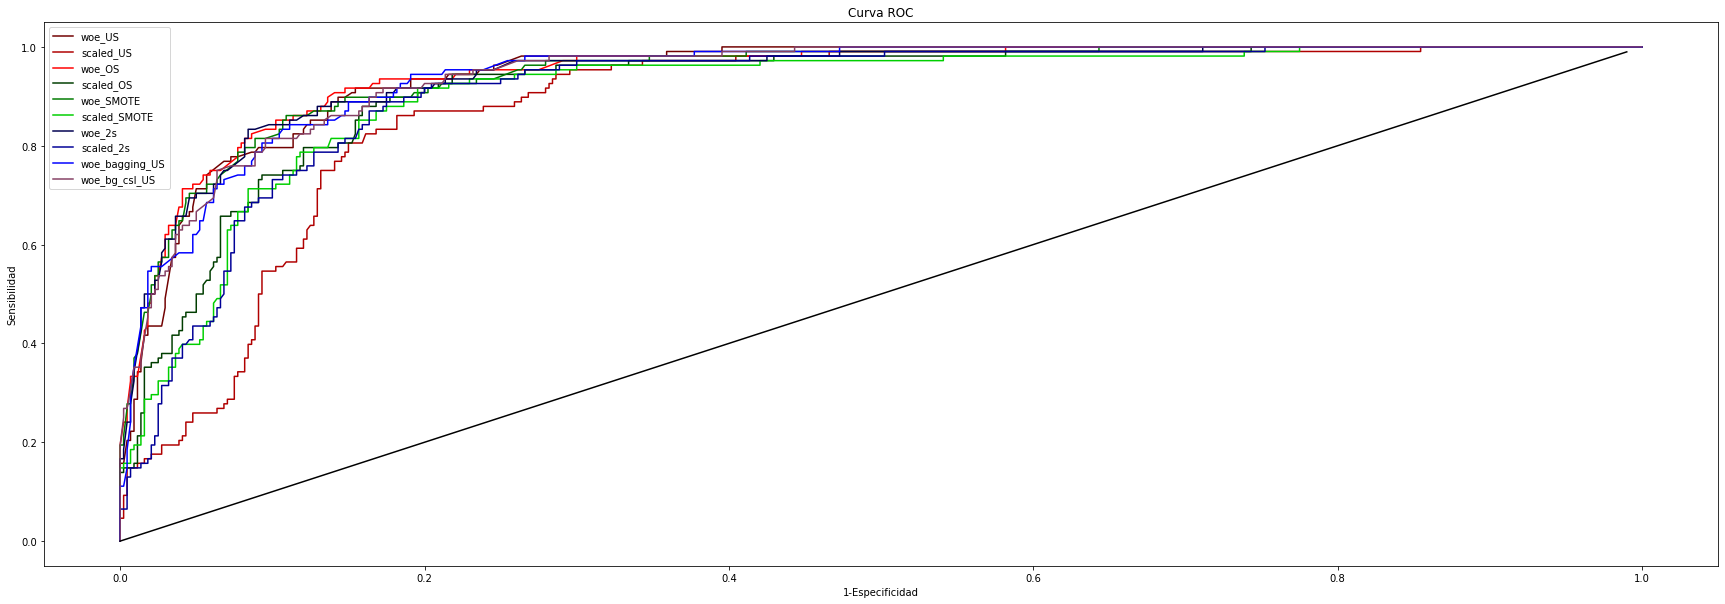

In [173]:
ten_colors = [ '#710000', '#b00000', '#ff0000', '#003d00', '#007b00', '#00cf00', '#000050', '#000097', '#0000ff', '#854064']
%matplotlib inline
plt.figure(figsize = (30,10))
x = [i * 0.01 for i in range(100)]
y = [i * 0.01 for i in range(100)]

#plt.plot(eval(prefixes[0]+suffixes[1]),eval(prefixes[0]+suffixes[1]), color=ten_colors[0], label=suffixes[1])

for k,(i,j) in enumerate(zip(suffixes,ten_colors)):
 
  plt.plot(
      eval(prefixes[0]+suffixes[k]),
      eval(prefixes[1]+suffixes[k]), 
      color=j, 
      label=suffixes[k][1:])
  
plt.plot(x,y, color='k')
plt.xlabel('1-Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Conclusiones
Se realizó el entrenamiento de varios módelos de clasificación de regresión logística, en conjunto a dos métodos de transformación de datos(WoE y scaling), cuatro métodos de muestreo y 3 métodos de módelamiento (Cross validation, Ensemble learning, y cost-sensitivity learning).<br>
Evaluando las métricas se puede destavar que al conjunto de datos le va mejor un sobremuestreo con unas métricas altas de recall, f1 y gini.<br>
Otro método que se puede considerar útil es el sub muestreo<br>
Según los parametros obtenidos por ambos módelos se pueden sacar varias conclusiones

In [190]:
coef_OS = pd.DataFrame(list(zip(df_train_just_woe.columns[1:],list(lr_woe_OS.coef_[0]))))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70],
 <a list of 71 Text major ticklabel objects>)

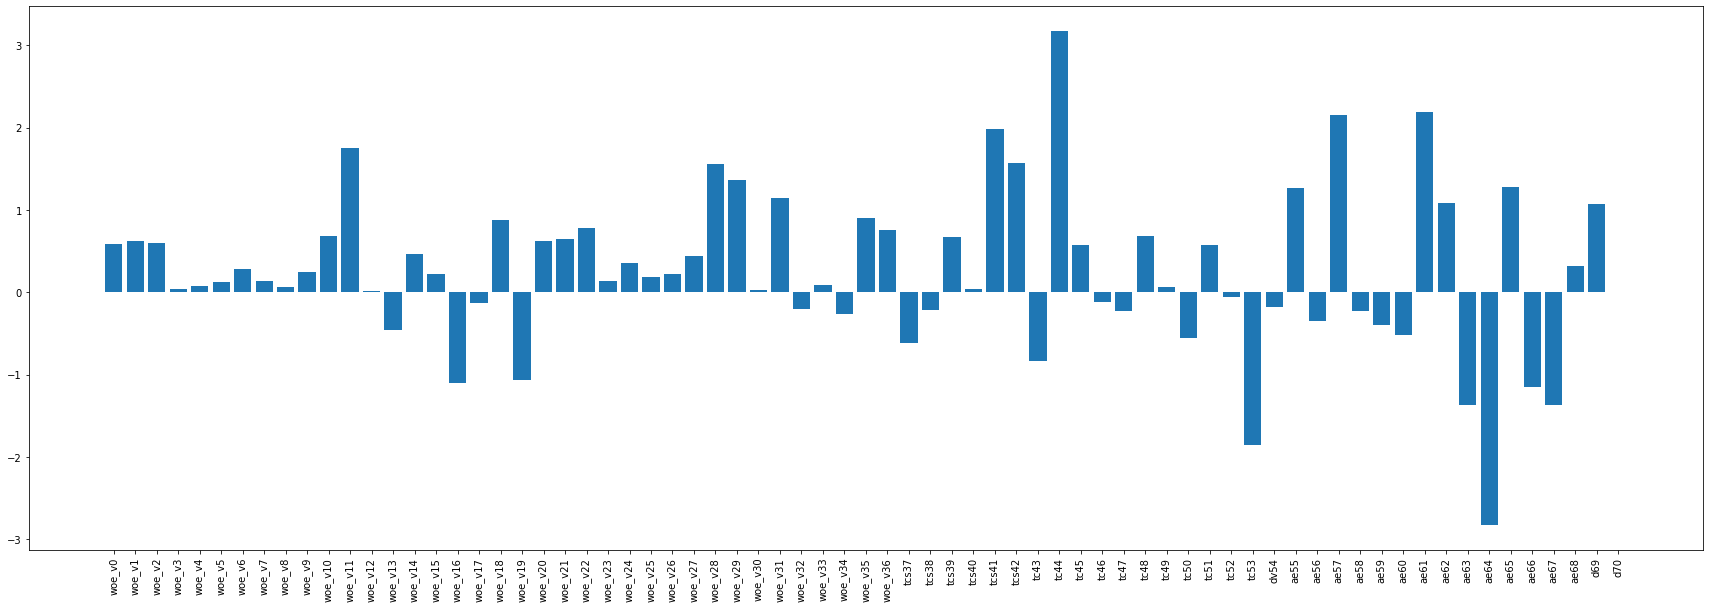

In [193]:
plt.figure(figsize = (30,10))
plt.bar(coef_OS[0],coef_OS[1])
plt.xticks(rotation=90)

v16, v19, tc53, ae64, ae67, ae68

In [191]:
coef_US = pd.DataFrame(list(zip(df_train_just_woe.columns[1:],list(lr_woe_US.coef_[0]))))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70],
 <a list of 71 Text major ticklabel objects>)

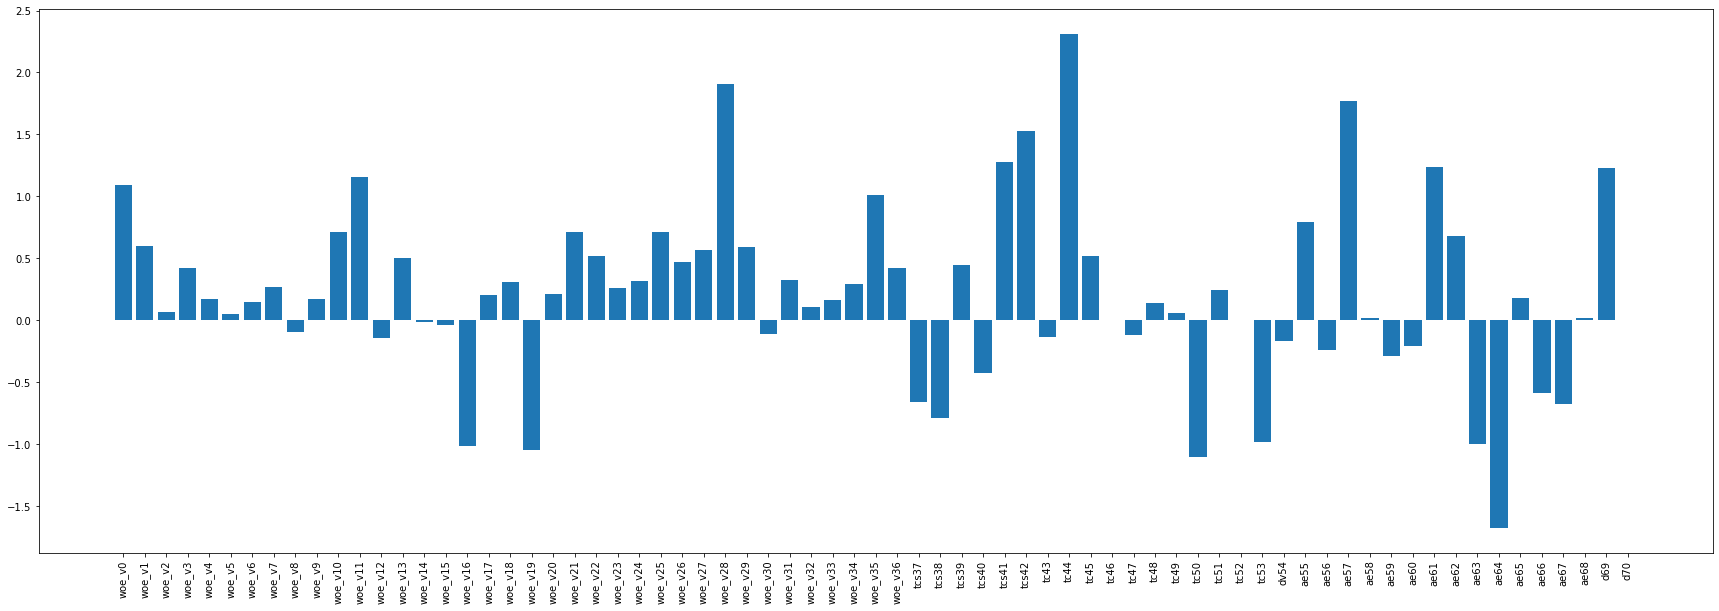

In [194]:
plt.figure(figsize = (30,10))
plt.bar(coef_US[0],coef_US[1])
plt.xticks(rotation=90)

Se puede observar que las variables que más influyen en una falta de pago son v0, v11, v28, tcs41, tcs42, tc44, ae57, ae61, d70 mientras que las que dan mayor seguridad son v16, v19, tc53, ae63, ae64, ae67, ae68.